<div class="alert alert-block alert-info"> <br>

#  <center> <b> Data Mining Project- ABCDEats Inc. </center> <br>
## <center> Clustering Models </center> <br>
### <center> Group 38 <center>

  <div>

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Inês Araújo       | 20240532@novaims.unl.pt      | 20240532   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Rafael Silva      | 20240511@novaims.unl.pt      | 20240511   |
| Rita Serra        | 20240515@novaims.unl.pt      | 20240515   |

---

### **2. Clustering Techniques Notebook**
**Description:**
In this notebook, we will experiment with and evaluate various clustering techniques to uncover patterns and groupings within the data. The focus will be on the following methods:

- **Hierarchical Clustering:** Organizes the data into a hierarchy of clusters, providing insights into relationships at multiple levels of granularity.
- **K-Means Clustering:** Partitions the data into a predefined number of clusters (`k`), optimizing similarity within each group.
- **Self-Organizing Maps (SOMs):** Uses neural network-based methods to project high-dimensional data into a lower-dimensional map, revealing complex clustering patterns.

Key steps include:
- Loading the **dataset** for clustering analysis.
- Applying **preprocessing and normalization** to prepare the data for clustering.
- **Implementing clustering algorithms**: Experimenting with the three techniques mentioned above.
- **Visualization and evaluation:** Visualizing cluster formations and analyzing their quality using metrics such as Silhouette Score.
- **Comparison:** Comparing the strengths and limitations of each method.

This notebook serves as a foundational exploration of clustering methods, providing insights into how different techniques handle the same dataset.

---

<a id = "toc"></a>

## **Table of Contents** <br>
+ [1.Import Libraries](#importlibraries) <br>

+ [2. Import Dataset](#importdataset) <br>

+ [3. Hierarchical Clustering](#section_3) <br>
  + [3.1 Customer profile Perspective](#section_3_1) <br>
  + [3.2 Purchasing Patterns Perspective](#section_3_2) <br>
  + [3.3 Customer Behavior Perspective](#section_3_3) <br>
  + [3.4 Culinary Preferences Perspective](#section_3_4) <br>
  
+ [4. K-Means Clustering](#section_4) <br>
  + [4.1 Customer profile Perspective](#section_4_1) <br>
  + [4.2 Purchasing Patterns Perspective](#section_4_2) <br>
  + [4.3 Customer Behavior Perspective](#section_4_3) <br>
  + [4.4 Culinary Preferences Perspective](#section_4_4) <br>

+ [5. Self-Organization Maps](#section_5) <br>
  + [5.1 Customer profile Perspective](#section_5_1) <br>
  + [5.2 Purchasing Patterns Perspective](#section_5_2) <br>
  + [5.3 Customer Behavior Perspective](#section_5_3) <br>
  + [5.4 Culinary Preferences Perspective](#section_5_4) <br>

+ [6. DBSCAN](#section_6) <br>
  + [6.1 Customer profile Perspective](#section_6_1) <br>
  + [6.2 Purchasing Patterns Perspective](#section_6_2) <br>
  + [6.3 Customer Behavior Perspective](#section_6_3) <br>
  + [6.4 Culinary Preferences Perspective](#section_6_4) <br>

+ [7. MeanShift Clustering](#section_7) <br>
  + [7.1 Customer profile Perspective](#section_7_1) <br>
  + [7.2 Purchasing Patterns Perspective](#section_7_2) <br>
  + [7.3 Customer Behavior Perspective](#section_7_3) <br>
  + [7.4 Culinary Preferences Perspective](#section_7_4) <br>
 
+ [8. Best Models](#section_8) <br>
+ [9.  Merging the Perspectives](#section_9) <br>

<div class="alert alert-block alert-success">
<a class="anchor" id="importlibraries">

# 1. Import Libraries
</a>

[Back to ToC](#toc)

In this section we will imported the needed libraries for this notebook.

</div>

In [16]:
from DM2425_Part2_38_03 import *
from DM2425_Part2_38_04 import *

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score, silhouette_samples

<div class="alert alert-block alert-success">
<a class="anchor" id="importdataset">

# 2. Import dataset
</a>

[Back to ToC](#toc)

Importing the dataset for further processing and grouping features into categories to enable clustering based on different perspectives.

</div>

In [3]:
# Load the prepocessed dataset 
df = pd.read_csv('Preprocessed_Data.csv', index_col='customer_id')

In [4]:
# Check the columns of the preprocessed dataset
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'first_order',
       'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes',
       ...
       'is_chain_6', 'is_chain_7', 'is_chain_8', 'is_chain_9',
       'is_chain_Other Chains', 'last_promo_DISCOUNT', 'last_promo_FREEBIE',
       'last_promo_NOPROMO', 'payment_method_CASH', 'payment_method_DIGI'],
      dtype='object', length=109)

Before beginning the clustering process, we can reduce the dimensionality of the features by categorizing them into four main groups, each representing different aspects of customer information and behavior:

1. **Customer Profile (`Customer_profile`)**  
   Describes the basic details and temporal purchase activity of the customer:  
   - `customer_age`: The age of the customer.  
   - `first_order`: The date of the customer's first order.  
   - `last_order`: The date of the customer's most recent order.  
   - `dif_order`: The time difference between the first and last order, indicating customer activity over time.

2. **Purchasing Patterns (`Purchasing_patterns`)**  
   Highlights the customer's ordering behavior on specific days:  
   - `tot_work_days`: Total number of orders placed on working days.  
   - `tot_leisure_days`: Total number of orders placed on leisure.

3. **Customer Behavior (`Customer_behavior`)**  
   Analyzes the customer's activity based on time-of-day preferences:  
   - `tot_early_morning`: Orders placed in the early morning.  
   - `tot_breakfast`: Orders placed during breakfast hours.  
   - `tot_lunch`: Orders placed during lunch hours.  
   - `tot_afternoon`: Orders placed in the afternoon.  
   - `tot_dinner`: Orders placed during dinner hours.  
   - `tot_late_night`: Orders placed late at night.

4. **Culinary Preferences (`Culinary_preferences`)**  
   Focuses on the customer's choice of cuisines and overall culinary habits:  
   - `tot_western_cuisines`: Total orders of Western-style cuisines.  
   - `tot_oriental_cuisines`: Total orders of Oriental-style cuisines.  
   - `tot_other_cuisines`: Total orders of other styles of cuisines.  
   - `purchased_cuisines`: The specific cuisines purchased by the customer.  
   - `tot_CUI`: Total number of unique cuisines ordered by the customer.  


In [5]:
# Define the feature groups
Customer_profile = ['customer_age', 'first_order', 'last_order', 'dif_order']
Purchasing_patterns = ['tot_work_days', 'tot_leisure_days']
Customer_behavior = ['tot_early_morning', 'tot_breakfast','tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night']
Culinary_preferences = ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']

In [6]:
# Creating the susets for each feature group
df_selected_1 = df[Customer_profile]
df_selected_2 = df[Purchasing_patterns]
df_selected_3 = df[Customer_behavior]
df_selected_4 = df[Culinary_preferences]

In [7]:
# Dictionary of categories and your respective features
categories = {
    'Customer_profile': Customer_profile,
    'Purchasing_patterns': Purchasing_patterns,
    'Customer_behavior': Customer_behavior,
    'Culinary_preferences': Culinary_preferences
}

<div class="alert alert-block alert-success">
<a class="anchor" id="section_3">
    
# 3. Hierarchical Clustering
</a>

[Back to ToC](#toc)



<div>

To address the computational complexity associated with large datasets, we will implement a hybrid approach that combines K-Means and Hierarchical Clustering (HC). This strategy leverages the efficiency of K-Means and the precision of HC, resulting in a more effective and scalable analysis.

<a class="anchor" id="section_3_1">
    
## 3.1 Customer profile Perspective
    
</a>

[Back to 3. Hierarchical Clustering](#section_3)

<a class="anchor" id="section_3_1_1">
    
### 3.1.1 First Analysis
    
</a>

In [7]:
calculate_max_clusters(df_selected_1)

Maximum number of possible clusters: 21116


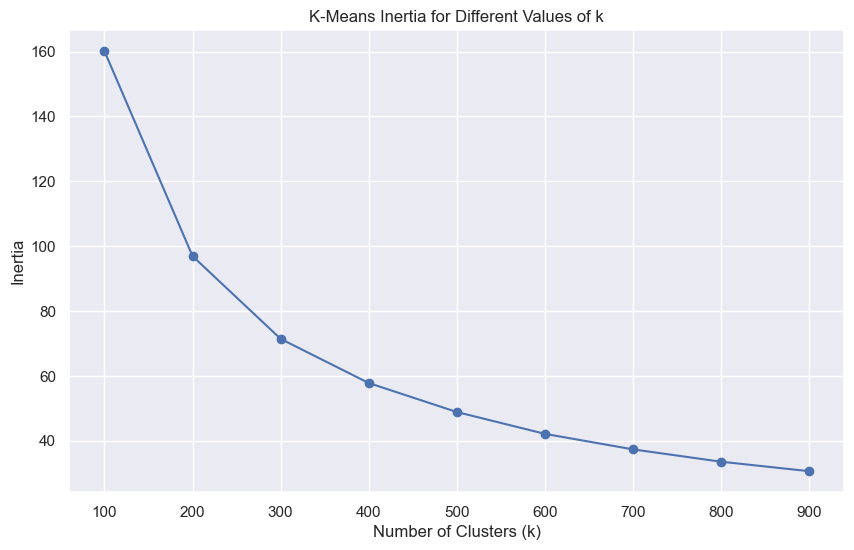

In [8]:
# Calculate and visualize the inertia for K-Means clustering with different numbers of clusters
inertia(df_selected_1, 100, end=1000, step=100)

In [9]:
km_profil, clust_centers_1, km_labels = apply_kmeans_clustering(df_selected_1, n_clusters=400)

In [10]:
hc_methods = ["ward", "complete", "average", "single"]  # the hierarchical clustering methods to evaluate
max_nclus = 10                                          # maximum number of clusters to test

# Calculate R² values for each hierarchical clustering method
r2_hc = np.vstack([ get_r2_hc(km_profil, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

# Create a DataFrame to organize the R² values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


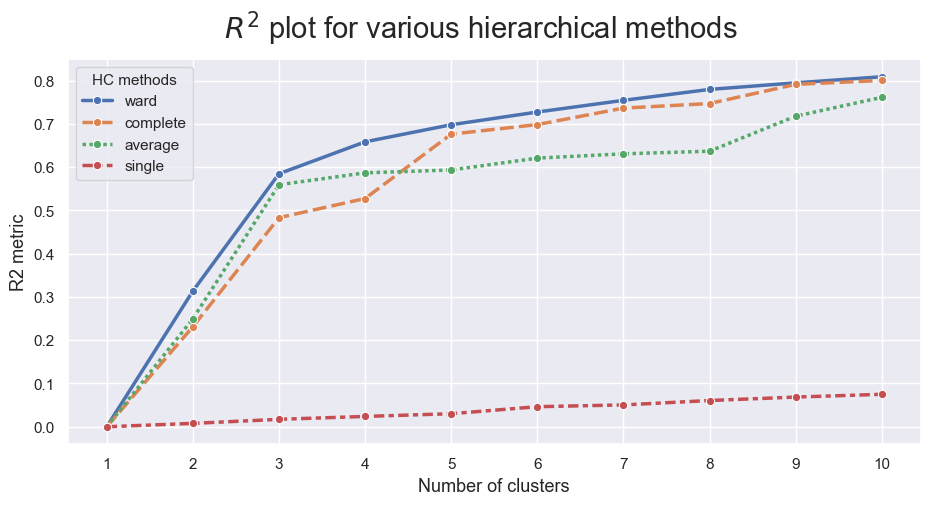

In [11]:
plot_r2_hc_methods(
    r2_hc_df=r2_hc_methods,
    max_nclus=max_nclus
)

- **Ward** presents the highest R2 for any number of clusters, indicating that it best explains the variation in the data. It is ideal for forming compact, well-separated clusters.
- When looking at the graphs, the "elbow" of the curve occurs in **3 clusters**, regardless of the method used.

<a class="anchor" id="section_3_1_2">
    
### 3.1.2 Defining the number of clusters using Dendograms
    
</a>

In [12]:
# Setting distance_threshold=0 and n_clusters=None ensures the full dendrogram tree is computed.
linkage = 'ward'
distance = 'euclidean'

# Initialize the Agglomerative Clustering algorithm and fit the data
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_profil)

array([244, 389, 352, 388, 277, 297, 264, 222, 283, 387, 337, 391, 374,
       272, 210, 215, 340, 298, 295, 228, 399, 347, 286, 205, 315, 212,
       293, 339, 335, 361, 396, 380, 291, 268, 224, 300, 241, 306, 240,
       398, 209, 249, 304, 324, 261, 341, 169, 193, 356, 348, 346, 238,
       307, 328, 289, 296, 376, 330, 290, 390, 357, 292, 288, 355, 373,
       386, 383, 325, 310, 144, 384, 358, 207, 305, 239, 250, 368, 360,
       329, 274, 370, 260, 393, 281, 308, 262, 237, 319, 338, 365, 234,
       242, 168, 318, 323, 246, 204, 229, 372, 236, 247, 385, 254, 369,
       334, 354, 255, 284, 164, 256, 333, 311, 353, 270, 199, 351, 377,
       217, 366, 276, 216, 287, 394, 203, 279, 336, 124, 359, 202, 345,
       285, 206, 107, 265, 362, 392, 271, 191, 220, 395, 248, 176, 280,
       312, 226, 225, 309, 313, 381, 266, 263, 123, 321, 303, 294, 235,
       317, 231, 275, 299, 252, 223, 154, 232, 214, 145, 152, 201, 382,
       314, 178, 194, 153, 245, 156, 342, 278, 175, 138, 151, 24

In [13]:
# Calculate the linkage matrix
linkage_matrix = compute_linkage_matrix(hclust)

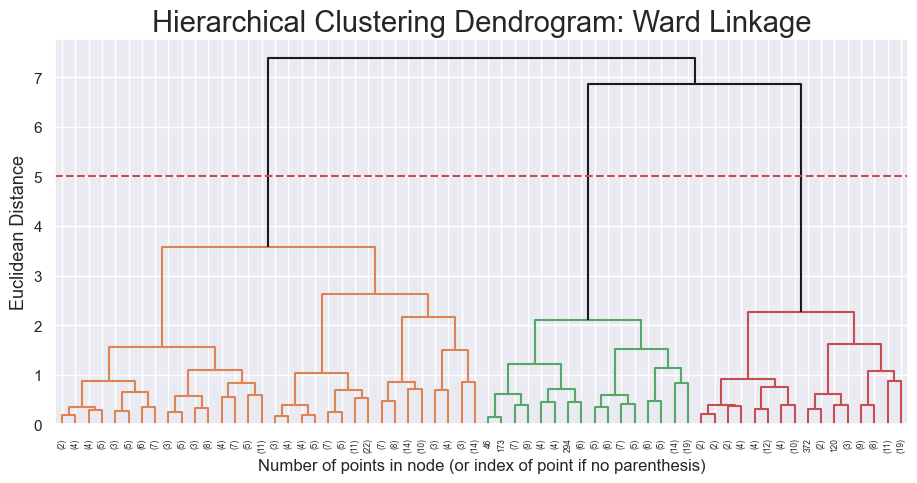

In [14]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 5)
plot_dendrogram(
    linkage_matrix=linkage_matrix,
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=5
)

In this plot we observe 3 clusters

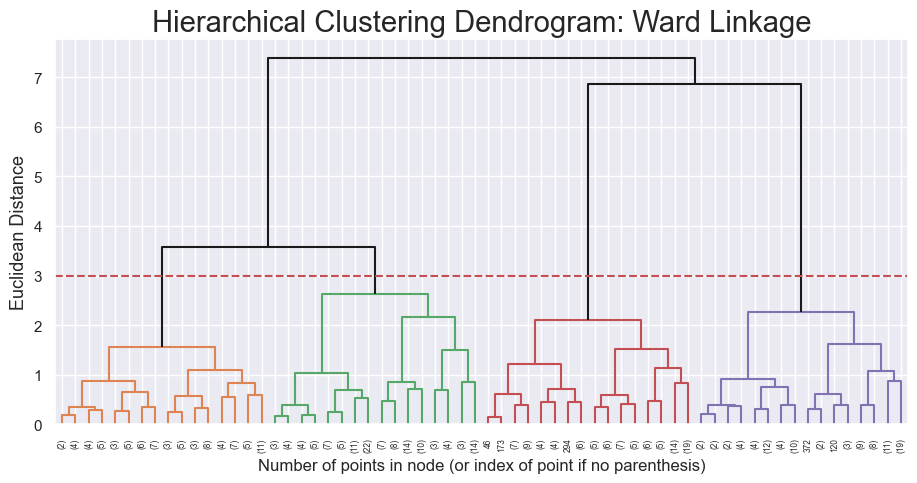

In [15]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 3)
plot_dendrogram(
    linkage_matrix=compute_linkage_matrix(hclust),
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=3
)

__`Conclusion`__ With a threshold of 3, we observe 4 clusters.

<a class="anchor" id="section_3_1_3">
    
### 3.1.3 Test Cluster Solution
    
</a>

Testing the solution with **3 clusters**:

In [16]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

# Initialize the Agglomerative Clustering algorithm and fit the data
hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_profil)

In [17]:
# Concatenate the original DataFrame and the cluster labels into a single DataFrame
df_clusters_concat = pd.concat([df_selected_1, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

# Group the concatenated DataFrame by the 'KM_labels' column (cluster labels)
df_clusters_concat.groupby('KM_labels').mean()

customer_age  first_order  last_order  dif_order
KM_labels                                                  
0              0.250878     0.603062    0.608749   0.200998
1              0.157525     0.197746    0.932126   0.786555
2              0.174625     0.062049    0.361760   0.437268
3              0.162414     0.921623    0.925948   0.199904
4              0.105385     0.522083    0.825972   0.440625
...                 ...          ...         ...        ...
395            0.235198     0.011616    0.696128   0.746483
396            0.182449     0.246479    0.681377   0.545900
397            0.683761     0.207407    0.411111   0.360119
398            0.175073     0.385513    0.618143   0.383363
399            0.094376     0.221569    0.917927   0.756002

[400 rows x 4 columns]

In [18]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_profile3 = df_clusters_concat.merge(pd.concat((km_profil, pd.Series(hc3_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')

# Rename the hierarchical clustering label column for clarity
kmhc_profile3.rename(columns={0:'HC_label'},inplace=True)

In [19]:
# Group the concatenated DataFrame by the 'HC_label' column
kmhc_profile3.drop(columns='KM_labels').groupby('HC_label').mean()

customer_age  first_order  last_order  dif_order
HC_label                                                  
0             0.193516     0.201444    0.832442   0.703481
1             0.190328     0.723185    0.786432   0.247251
2             0.189422     0.205745    0.299461   0.271736

----

Testing the solution with **4 clusters**:

In [20]:
n_clusters= 4

# Initialize the Agglomerative Clustering algorithm and fit the data
hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_profil)

In [21]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_profile4 = df_clusters_concat.merge(pd.concat((km_profil, pd.Series(hc4_labels)), axis=1).iloc[:,4], left_on='KM_labels',right_index=True, how='left')

# Rename the hierarchical clustering label column for clarity
kmhc_profile4.rename(columns={0:'HC_label'},inplace=True)

In [22]:
# Group the concatenated DataFrame by the 'HC_label' column
kmhc_profile4.drop(columns='KM_labels').groupby('HC_label').mean()

customer_age  first_order  last_order  dif_order
HC_label                                                  
0             0.198155     0.102281    0.846184   0.794208
1             0.190328     0.723185    0.786432   0.247251
2             0.189422     0.205745    0.299461   0.271736
3             0.185091     0.381573    0.807480   0.538675

In [23]:
# Do the crosstable between the the hc for 4 clusters and the hc for 3 clusters
pd.crosstab(kmhc_profile4['HC_label'], kmhc_profile3['HC_label'])

HC_label      0     1     2
HC_label                   
0         10939     0     0
1             0  7140     0
2             0     0  6991
3          6022     0     0

The analysis identified the following patterns between the clusters of `kmhc_profile4` and `kmhc_profile3`:

- Cluster 0 in `kmhc_profile4` aligns with Cluster 1 in `kmhc_profile3`.
- Cluster 2 in `kmhc_profile4` corresponds to Cluster 2 in `kmhc_profile3`.
- Cluster 0 in `kmhc_profile3`, however, splits across Clusters 1 and 3 in `kmhc_profile4`.

The R² metric shows diminishing returns in explained variance beyond 3 clusters, meaning additional clusters do not provide meaningful improvements. The dendrogram supports this by revealing a natural “elbow” at 3 clusters, where merging more clusters results in less cohesive groupings.

Lastly, the crosstab matrix confirms that using 4 clusters introduces unnecessary complexity, splitting existing clusters without strong justification, as observed with the division of Cluster 0 from `kmhc_profile3`.

**Conclusion:**
Based on the R² analysis, dendrograms, and the crosstab matrix, we conclude that 3 clusters provide the optimal balance. This configuration ensures well-defined clusters that effectively capture the data's main structure while maintaining interpretability.

<a class="anchor" id="section_3_1_4">
    
### 3.1.4 Final Hierarchical clustering solution
    
</a>

In [24]:
# Set the hc with 3 clusters as the best one
kmhc_profile_final = kmhc_profile3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_profile_final

customer_age  first_order  last_order  dif_order
HC_label                                                  
0             0.193516     0.201444    0.832442   0.703481
1             0.190328     0.723185    0.786432   0.247251
2             0.189422     0.205745    0.299461   0.271736

**Conclusions**:

The variable  `customer_age` exhibits minimal variation across clusters (with mean values ranging from 0.190 to 0.193), indicating that age does not play a significant role in differentiating the identified groups.

- Cluster 0: Comprised of customers who made their first purchase during an intermediate period and exhibit a small difference between the time of their first and last purchases, suggesting low recurrence.
  
- Cluster 1: A group of highly loyal and recurrent customers, with a long history of purchases that began at the start of the analyzed period and who remain active until the end.
  
- Cluster 2: Includes customers who made purchases early in the analyzed period but are no longer active, displaying low loyalty and recurrence.

In [25]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_1,kmhc_profile3['HC_label']))

print("Silhouette score for this solution: ",silhouette_score(df_selected_1,kmhc_profile3['HC_label']))

BD index for this solution:  0.727472900825295
Silhouette score for this solution:  0.4512477757309634


<a class="anchor" id="section_3_2">
    
## 3.2 Purchasing Patterns Perspective
    
</a>

[Back to 3. Hierarchical Clustering](#section_3)

<a class="anchor" id="section_3_2_1">
    
### 3.2.1 First Analysis
    
</a>

In [26]:
calculate_max_clusters(df_selected_2)

Maximum number of possible clusters: 306


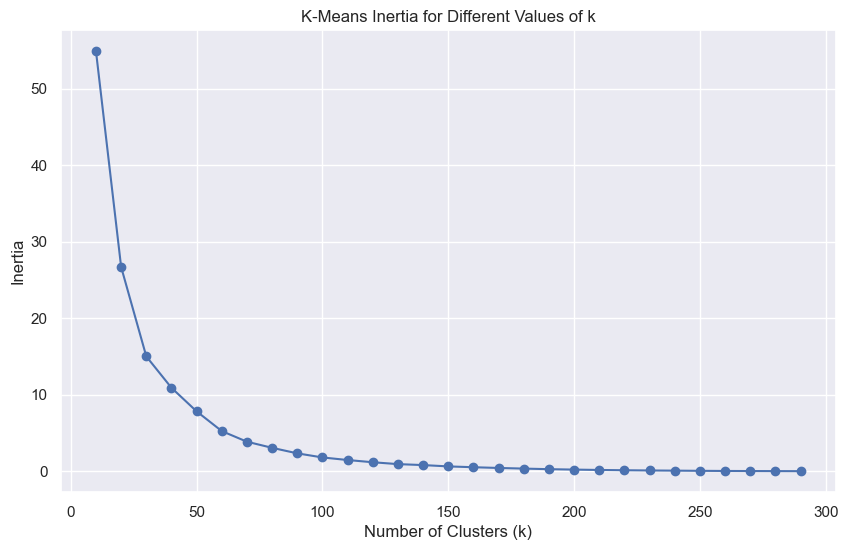

In [27]:
# Calculate and visualize the inertia for K-Means clustering with different numbers of clusters
inertia(df_selected_2, start=10, end=300, step= 10)

In [28]:
km_purchasing, clust_centers_2, km_labels = apply_kmeans_clustering(df_selected_2, n_clusters=50)

In [29]:
hc_methods = ["ward", "complete", "average", "single"]  # the hierarchical clustering methods to evaluate
max_nclus = 10                                          # maximum number of clusters to test

# Calculate R² values for each hierarchical clustering method
r2_hc = np.vstack([ get_r2_hc(km_purchasing, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

# Create a DataFrame to organize the R² values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

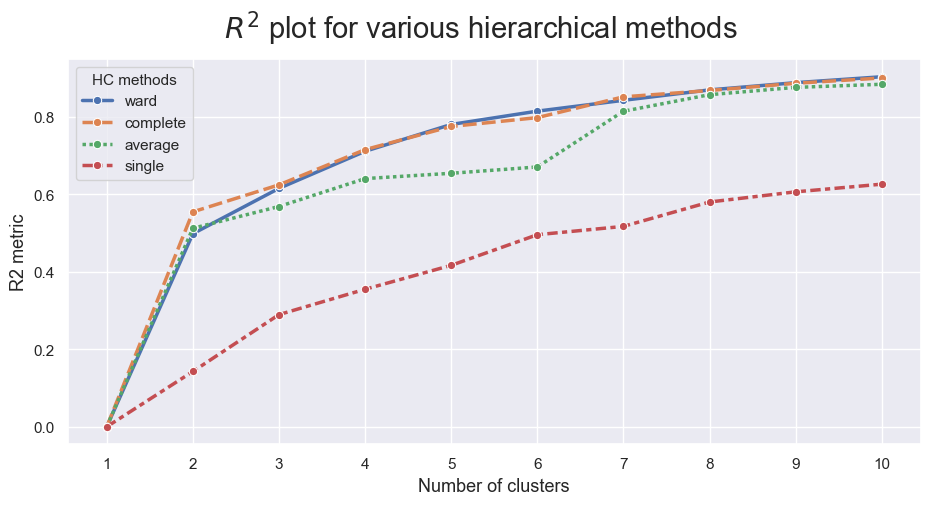

In [30]:
plot_r2_hc_methods(
    r2_hc_df=r2_hc_methods,
    max_nclus=max_nclus
)

Despite the competitiveness between the Ward and Complete methods, the Ward method demonstrates superior performance. The optimal number of clusters appears to range from 2 to 4

<a class="anchor" id="section_3_1_2">
    
### 3.1.2 Defining the number of clusters using Dendograms
    
</a>

In [31]:
# Setting distance_threshold=0 and n_clusters=None ensures the full dendrogram tree is computed.
linkage = 'ward'
distance = 'euclidean'

# Initialize the Agglomerative Clustering algorithm and fit the data
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_purchasing)

array([49, 48, 26, 42, 29, 33, 41, 45, 30, 34, 16, 47, 27, 37, 39, 38, 28,
       44, 46, 20, 22, 43, 21, 36, 35, 31, 40, 25, 19, 32, 13, 23, 18, 10,
       14, 15,  9,  7,  4,  6, 17,  8, 24, 11, 12,  5,  3,  2,  1,  0],
      dtype=int64)

In [32]:
# Calculate the linkage matrix
linkage_matrix = compute_linkage_matrix(hclust)

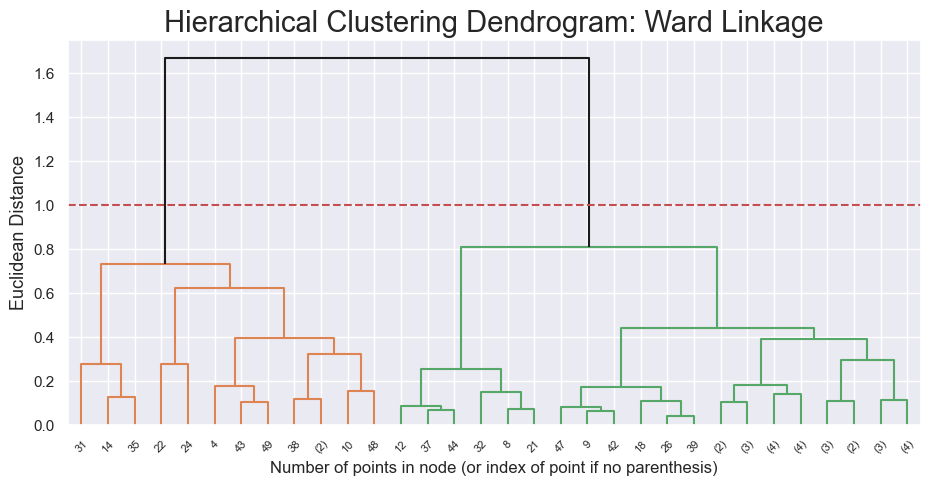

In [33]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 1)
plot_dendrogram(
    linkage_matrix=linkage_matrix,
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=1
)

<a class="anchor" id="section_3_2_3">
    
### 3.2.3 Test Cluster Solution
    
</a>

Trying for **2 clusters**:

In [34]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 2

# Initialize the Agglomerative Clustering algorithm and fit the data
hc2_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc2_labels = hc2_clust.fit_predict(km_purchasing)

In [35]:
# Concatenate the original DataFrame and the cluster labels into a single DataFrame
df_clusters_concat = pd.concat([df_selected_2, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_2.index)], 
                    axis=1)

# Group the concatenated DataFrame by the 'KM_labels' column (cluster labels)
df_clusters_concat.groupby('KM_labels').mean()

tot_work_days  tot_leisure_days
KM_labels                                 
0               0.153846          0.000000
1               0.076923          0.034483
2               0.275581          0.237801
3               0.000000          0.033111
4               0.640443          0.233542
5               0.085113          0.188803
6               0.153846          0.082769
7               0.038462          0.034483
8               0.408699          0.086368
9               0.216653          0.125734
10              0.497097          0.389070
11              0.076923          0.103448
12              0.331273          0.033456
13              0.000000          0.113171
14              0.197227          0.341620
15              0.038462          0.000000
16              0.192308          0.083664
17              0.115385          0.000000
18              0.152144          0.241074
19              0.000000          0.068966
20              0.038462          0.068966
21              0.362322          0.141445
22              0.795385          0.380690
23              0.076923          0.000000
24              0.644796          0.612576
25              0.038462          0.103448
26              0.115385          0.151007
27              0.115385          0.034483
28              0.076923          0.068966
29              0.000000          0.183172
30              0.374609          0.241660
31              0.213942          0.568966
32              0.503205          0.057950
33              0.115385          0.068966
34              0.153846          0.034483
35              0.072485          0.346154
36              0.038462          0.148879
37              0.240464          0.036264
38              0.319597          0.339901
39              0.153846          0.152109
40              0.076923          0.137931
41              0.115385          0.103448
42              0.209077          0.186069
43              0.502051          0.172414
44              0.286293          0.085688
45              0.040371          0.232820
46              0.192308          0.019252
47              0.283603          0.153176
48              0.389423          0.497845
49              0.477436          0.274023

In [36]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing2 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc2_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')

# Rename the hierarchical clustering label column for clarity
kmhc_purchasing2.rename(columns={0:'HC_label'},inplace=True)

In [ ]:
# Group the concatenated DataFrame by the 'HC_label' column
kmhc_purchasing2.drop(columns='KM_labels').groupby('HC_label').mean()

tot_work_days  tot_leisure_days
HC_label                                 
0              0.075736          0.052367
1              0.372145          0.295362

----

Trying for **3 clusters**:

In [38]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

# Initialize the Agglomerative Clustering algorithm and fit the data
hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_purchasing)

In [39]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_purchasing3 = df_clusters_concat.merge(pd.concat((km_purchasing, pd.Series(hc3_labels)), axis=1).iloc[:,2], left_on='KM_labels',right_index=True, how='left')

# Rename the hierarchical clustering label column for clarity
kmhc_purchasing3.rename(columns={0:'HC_label'},inplace=True)

In [40]:
# Group the concatenated DataFrame by the 'HC_label' column
kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()

tot_work_days  tot_leisure_days
HC_label                                 
0              0.372145          0.295362
1              0.065707          0.051817
2              0.307048          0.065061

In [41]:
# Do the crosstable between the the hc for 2 clusters and the hc for 3 clusters
pd.crosstab(kmhc_purchasing2['HC_label'], kmhc_purchasing3['HC_label'])

HC_label    0      1     2
HC_label                  
0           0  28922  1254
1         916      0     0

The analysis identified the following patterns between the clusters from `kmhc_purchasing3` and `kmhc_purchasing2`:

- Cluster 0 in `kmhc_purchasing3` aligns directly with Cluster 1 in kmhc_purchasing2, indicating a clear correspondence.
- Cluster 0 in `kmhc_purchasing2`, however, splits across Clusters 1 and 2 in `kmhc_purchasing3`.

<a class="anchor" id="section_3_2_4">
    
### 3.2.4 Final Hierarchical clustering solution
    
</a>

Despite the "biggest jump" in the dendrograms being for k=2, we decided to maintain 3 clusters since a group emerges that has a value of orders on weekdays much higher than the number of orders made on leisure days

In [42]:
# Set the hc with 3 clusters as the best one
kmhc_purchasing_final= kmhc_purchasing3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_purchasing_final

tot_work_days  tot_leisure_days
HC_label                                 
0              0.372145          0.295362
1              0.065707          0.051817
2              0.307048          0.065061

**Conclusions**:
- __`Cluster 0:`__ Represents a group of customers whose values are relatively moderate, with a noticeable preference for purchases during workdays.
  
- __`Cluster 1:`__ Displays moderately low purchasing activity on workdays and very low activity on leisure days, indicating a tendency to prioritize food purchases primarily on workdays. 
  
- __`Cluster 2:`__ Characterized by extremely low values for both indicators, suggesting a group that is largely inactive or minimally engaged in food purchasing activities.

In [43]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_2,kmhc_purchasing3['HC_label']))
print("Silhouette score for this solution: ",silhouette_score(df_selected_2,kmhc_purchasing3['HC_label']))

BD index for this solution:  0.8650251626779752
Silhouette score for this solution:  0.5893670455791455


<a class="anchor" id="section_3_3">
    
## 3.3 Customer Behavior Perspective
    
</a>

[Back to 3. Hierarchical Clustering](#section_3)

<a class="anchor" id="section_3_3_1">
    
### 3.3.1 First Analysis
    
</a>

In [44]:
calculate_max_clusters(df_selected_3)

Maximum number of possible clusters: 3417


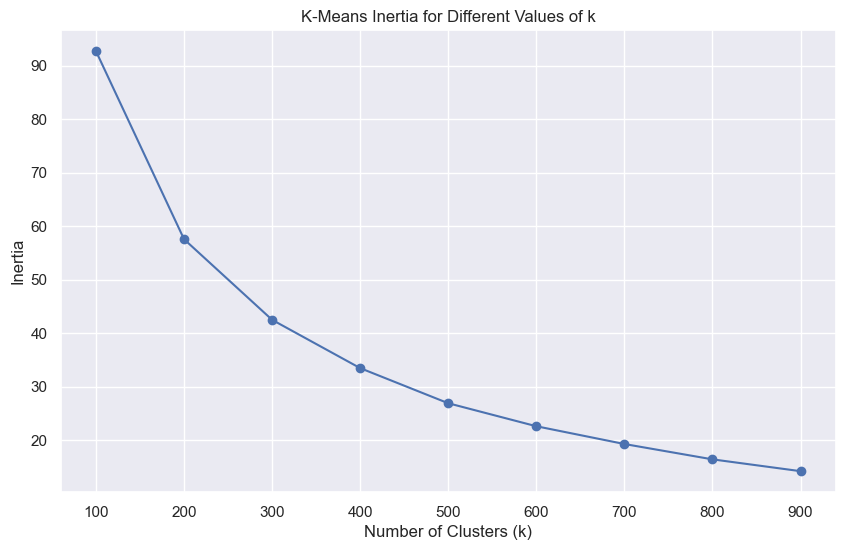

In [45]:
# Calculate and visualize the inertia for K-Means clustering with different numbers of clusters
inertia(df_selected_3, 100, end=1000, step=100)

In [46]:
km_customer, clust_centers_3, km_labels = apply_kmeans_clustering(df_selected_3, n_clusters=300)

In [47]:
hc_methods = ["ward", "complete", "average", "single"]  # the hierarchical clustering methods to evaluate
max_nclus = 10                                          # maximum number of clusters to test

# Calculate R² values for each hierarchical clustering method
r2_hc = np.vstack([ get_r2_hc(km_customer, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


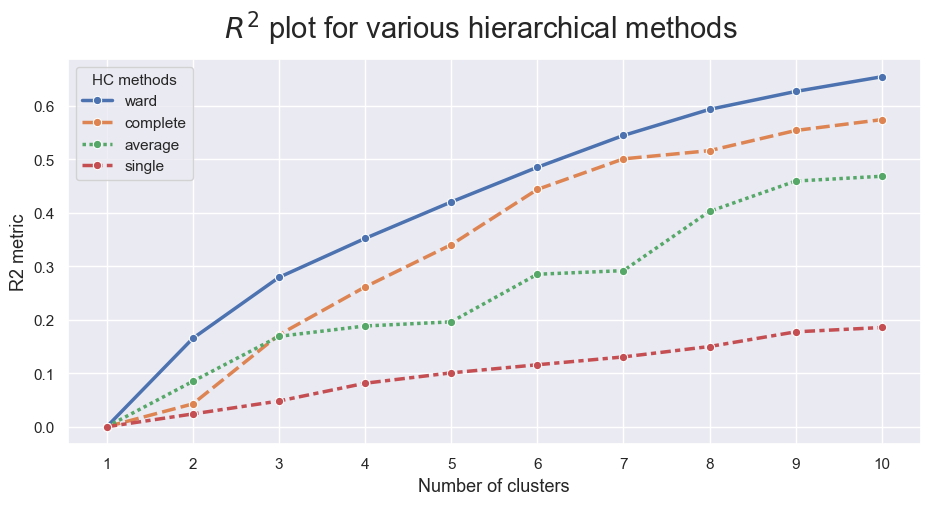

In [48]:
plot_r2_hc_methods(
    r2_hc_df=r2_hc_methods,
    max_nclus=max_nclus
)

The optimal number of clusters appears to be 3, determined using the Ward method, for the same reasons as in previous analyses.

<a class="anchor" id="section_3_3_2">
    
### 3.3.2 Defining the number of clusters using Dendograms
    
</a>

In [49]:
# Setting distance_threshold=0 and n_clusters=None ensures the full dendrogram tree is computed.
linkage = 'ward'
distance = 'euclidean'

# Initialize the Agglomerative Clustering algorithm and fit the data
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_customer)

array([298, 297, 164, 224, 289, 220, 238, 263, 199, 285, 166, 237, 283,
       219, 196, 287, 200, 247, 148, 228, 292, 294, 284, 233, 213, 207,
       248, 168, 171, 178, 279, 291, 243, 277, 254, 262, 261, 275, 268,
       215, 218, 236, 242, 167, 203, 255, 163, 273, 276, 161, 293, 259,
       257, 296, 216, 299, 234, 145, 217, 108, 295, 281, 230,  83, 201,
       225, 184, 288, 204, 226, 181, 109, 202, 146, 143, 162, 280, 137,
       251, 211, 130, 156, 286, 290, 270, 173, 182, 260, 155, 271, 100,
       282, 172, 169,  85, 140, 183, 253, 258, 112, 267, 147, 272, 252,
        73, 235, 159,  91, 250, 208, 101, 149, 180, 192, 187, 249, 185,
       210, 197, 139, 229, 256, 223, 244, 153,  77, 205, 269, 142, 189,
       188, 135, 118, 193, 214, 150, 239, 191, 170, 141,  99, 186, 117,
       265, 231,  74, 240, 274, 158, 221, 194, 195, 246, 133,  93, 116,
        84, 198, 232, 124, 266, 127,  95, 174, 165, 144, 206,  58, 151,
        82, 132,  80,  41, 264, 179, 102, 157, 176, 107,  96,  9

In [50]:
# Calculate the linkage matrix
linkage_matrix = compute_linkage_matrix(hclust)

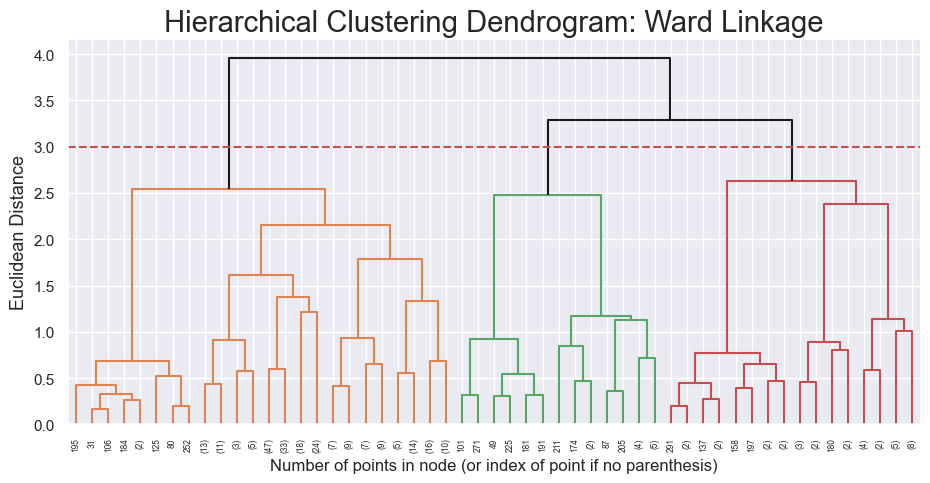

In [51]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 3)
plot_dendrogram(
    linkage_matrix=linkage_matrix,
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=3
)

The ideal number of clusters seems to be 3, as it maintains a significant separation between the groups without compromising the quality of the segmentation.

<a class="anchor" id="section_3_3_3">
    
### 3.3.3 Final Hierarchical clustering solution
    
</a>

In [52]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

# Initialize the Agglomerative Clustering algorithm and fit the data
hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_customer)

In [53]:
df_clusters_concat = pd.concat([df_selected_3, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
KM_labels                                                               
0                   0.000000       0.000000   0.000000       0.050000   
1                   0.000000       0.000000   0.052632       0.000000   
2                   0.000000       0.196875   0.032895       0.178125   
3                   0.001385       0.057895   0.142659       0.050000   
4                   0.105263       0.050000   0.000000       0.002607   
...                      ...            ...        ...            ...   
295                 0.003036       0.058654   0.188259       0.060577   
296                 0.003589       0.120455   0.105263       0.198864   
297                 0.004423       0.000000   0.105263       0.100000   
298                 0.001210       0.056897   0.000000       0.000000   
299                 0.012146       0.038462   0.307692       0.423077   

           tot_dinner  tot_late_night  
KM_labels                              
0            0.000000        0.000000  
1            0.050000        0.000000  
2            0.196875        0.007812  
3            0.215789        0.000000  
4            0.001896        0.000000  
...               ...             ...  
295          0.116346        0.000000  
296          0.007955        0.000000  
297          0.014706        0.000000  
298          0.115517        0.000000  
299          0.246154        0.019231  

[300 rows x 6 columns]

In [54]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_customer = df_clusters_concat.merge(pd.concat((km_customer, pd.Series(hc3_labels)), axis=1).iloc[:,6], left_on='KM_labels',right_index=True, how='left')

# Rename the hierarchical clustering label column for clarity
kmhc_customer.rename(columns={0:'HC_label'},inplace=True)

In [55]:
# Set the hc with 3 clusters as the best one
kmhc_customer.drop(columns='KM_labels').groupby('HC_label').mean()

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
HC_label                                                               
0                  0.028225       0.295268   0.259339       0.339432   
1                  0.021450       0.035160   0.050404       0.043234   
2                  0.010691       0.035937   0.206414       0.124609   

          tot_dinner  tot_late_night  
HC_label                              
0           0.093375        0.011041  
1           0.031793        0.009569  
2           0.547656        0.132812

**Conclusions**:
- Cluster 0: It exhibits a more consistent pattern of orders during the afternoon and breakfast periods, with lower activity in the early morning and late-night hours.
  
- Cluster 1: Represents customers with a low frequency of orders across all periods of the day, suggesting lower engagement or more sporadic habits.
  
- Cluster 2: Characterized by increased activity starting from lunchtime, with a particular focus on the dinner period.

In [56]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_3,kmhc_customer['HC_label']))
print("Silhouette score for this solution: ",silhouette_score(df_selected_3,kmhc_customer['HC_label']))

BD index for this solution:  1.3970050376189889
Silhouette score for this solution:  0.7035925802696835


<a class="anchor" id="section_3_4">
    
## 3.4 Culinary Preferences Perspective
    
</a>

[Back to 3. Hierarchical Clustering](#section_3)

<a class="anchor" id="section_3_4_1">
    
### 3.4.1 First Analysis
    
</a>

In [ ]:
calculate_max_clusters(df_selected_4)

Maximum number of possible clusters: 26067


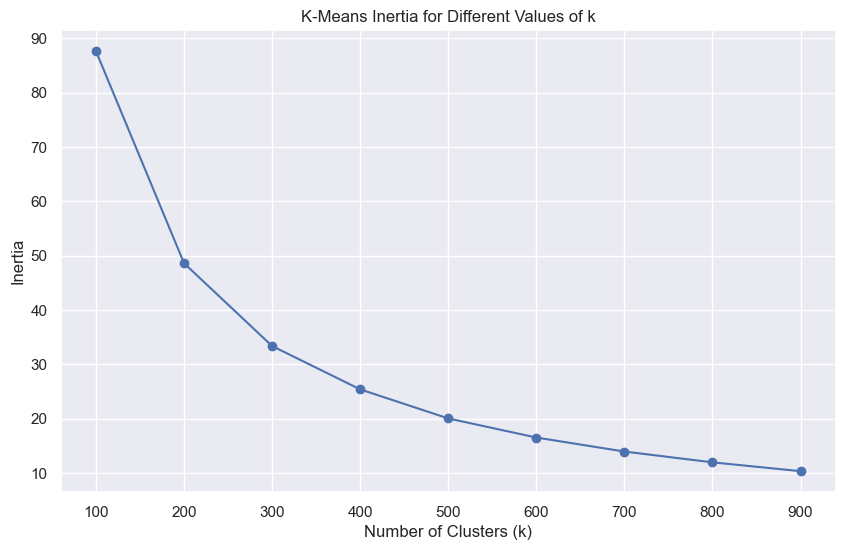

In [58]:
# Calculate and visualize the inertia for K-Means clustering with different numbers of clusters
inertia(df_selected_4, 100, end=1000, step=100)

In [59]:
km_culinary, clust_centers_4, km_labels = apply_kmeans_clustering(df_selected_4, n_clusters=400)

In [60]:
hc_methods = ["ward", "complete", "average", "single"]  # the hierarchical clustering methods to evaluate
max_nclus = 10                                          # maximum number of clusters to test

# Calculate R² values for each hierarchical clustering method

r2_hc = np.vstack([ get_r2_hc(km_culinary, 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

# Create a DataFrame to organize the R² values
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)


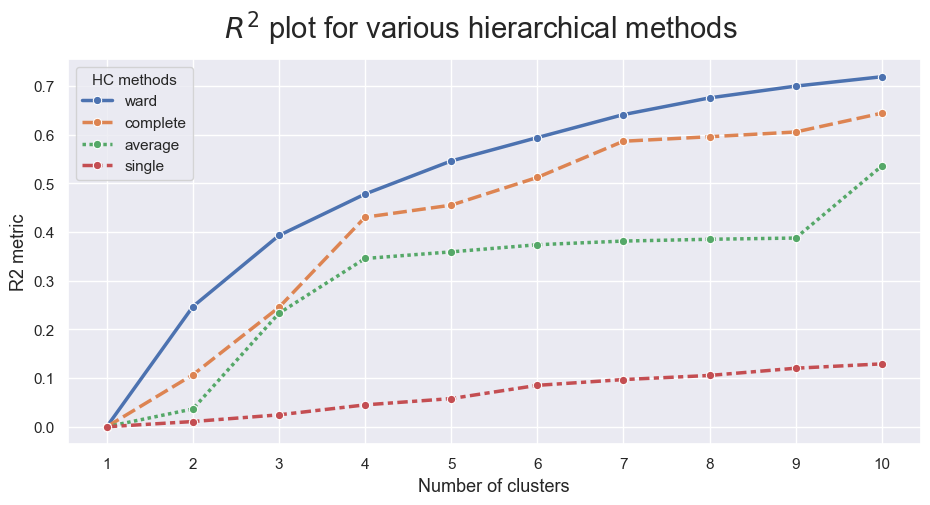

In [61]:
plot_r2_hc_methods(
    r2_hc_df=r2_hc_methods,
    max_nclus=max_nclus
)

The optimal number of clusters appears to be 3 or 4, determined using the Ward method, for the same reasons as in previous analyses.

<a class="anchor" id="section_3_4_2">
    
### 3.4.2 Defining the number of clusters using Dendograms
    
</a>

Trying for 3 clusters

In [ ]:
# Setting distance_threshold=0 and n_clusters=None ensures the full dendrogram tree is computed.
linkage = 'ward'
distance = 'euclidean'

# Initialize the Agglomerative Clustering algorithm and fit the data
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(km_culinary)

array([394, 308, 392, 356, 264, 254, 358, 375, 366, 381, 396, 286, 382,
       349, 263, 258, 367, 395, 312, 249, 360, 373, 399, 324, 333, 301,
       199, 353, 282, 304, 295, 232, 302, 364, 283, 325, 281, 384, 262,
       354, 331, 383, 318, 363, 202, 275, 378, 289, 321, 337, 297, 256,
       300, 322, 335, 253, 229, 393, 385, 365, 376, 311, 251, 344, 345,
       388, 215, 339, 379, 310, 319, 374, 280, 252, 307, 230, 219, 320,
       391, 390, 346, 211, 260, 271, 303, 334, 259, 210, 332, 206, 257,
       347, 368, 352, 217, 305, 207, 362, 398, 351, 341, 314, 235, 239,
       298, 247, 197, 159, 277, 291, 323, 160, 148, 288, 224, 377, 387,
       172, 213, 245, 315, 338, 166, 168, 316, 342, 397, 186, 246, 190,
       293, 203, 242, 176, 296, 150, 355, 195, 287, 170, 306, 208, 294,
        79, 250, 181, 241, 243, 276, 221, 269, 340, 223, 220, 380, 177,
       152, 238, 292, 165, 317, 126, 285, 273, 140, 326, 248, 309, 330,
       122, 212, 244, 290, 131, 272, 369, 389, 169, 370, 234, 23

In [63]:
# Calculate the linkage matrix
linkage_matrix = compute_linkage_matrix(hclust)

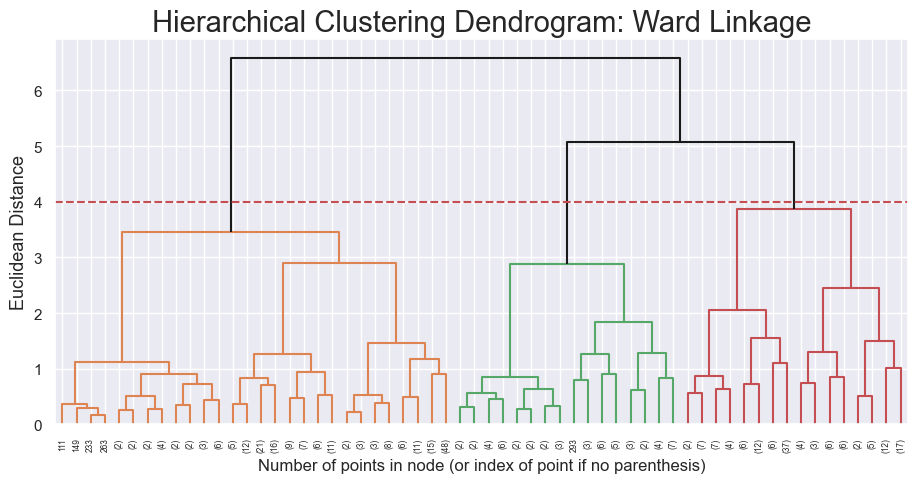

In [64]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 4)
plot_dendrogram(
    linkage_matrix=linkage_matrix,
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=4
)

----

Trying for **4 clusters**:


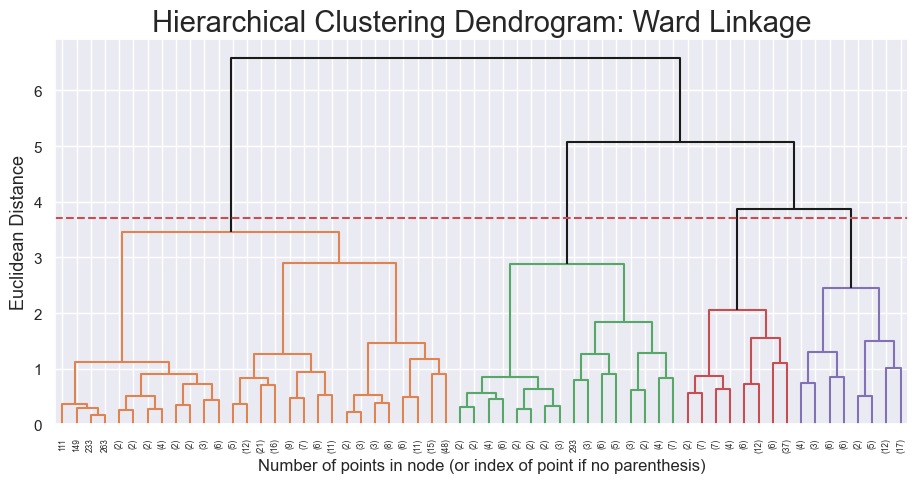

In [65]:
# Plot the dendrogram for hierarchical clustering using the computed linkage matrix (thresholded at 3.7)
plot_dendrogram(
    linkage_matrix=linkage_matrix,
    linkage_name=linkage,
    distance_metric=distance,
    y_threshold=3.7
)

<a class="anchor" id="section_3_4_3">
    
### 3.4.3 Test Cluster Solution
    
</a>

In [66]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 4

# Initialize the Agglomerative Clustering algorithm and fit the data
hc4_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc4_labels = hc4_clust.fit_predict(km_culinary)


In [ ]:
df_clusters_concat = pd.concat([df_selected_4, 
                       pd.Series(km_labels, 
                                 name='KM_labels', 
                                 index=df_selected_1.index)], 
                    axis=1)

df_clusters_concat.groupby('KM_labels').mean()

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
KM_labels                                                                    
0                      0.000000               0.097846            0.000000   
1                      0.203228               0.127786            0.012973   
2                      0.026717               0.023843            0.000000   
3                      0.014069               0.015605            0.080136   
4                      0.020016               0.426677            0.096944   
...                         ...                    ...                 ...   
395                    0.044543               0.069515            0.042994   
396                    0.151667               0.244249            0.091654   
397                    0.187986               0.910281            0.400560   
398                    0.200219               0.050547            0.217921   
399                    0.017328               0.080061            0.229164   

           purchased_cuisines   tot_CUI  
KM_labels                                
0                    0.166667  0.051633  
1                    0.666667  0.177816  
2                    0.333333  0.026552  
3                    0.666667  0.041055  
4                    0.500000  0.266428  
...                       ...       ...  
395                  0.500000  0.073635  
396                  0.666667  0.237316  
397                  1.000000  0.705930  
398                  0.833333  0.200609  
399                  0.500000  0.124128  

[400 rows x 5 columns]

In [68]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary4 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc4_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary4.rename(columns={0:'HC_label'},inplace=True)

In [ ]:
kmhc_culinary4.drop(columns='KM_labels').groupby('HC_label').mean()

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
HC_label                                                                    
0                     0.045147               0.052858            0.033050   
1                     0.067277               0.105469            0.387249   
2                     0.132134               0.556654            0.079651   
3                     0.087815               0.125381            0.125205   

          purchased_cuisines   tot_CUI  
HC_label                                
0                   0.316977  0.062001  
1                   0.556701  0.213887  
2                   0.534082  0.388144  
3                   0.888612  0.151864

In [70]:
linkage = 'ward'
distance = 'euclidean'
n_clusters = 3

# Initialize the Agglomerative Clustering algorithm and fit the data
hc3_clust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=n_clusters)
hc3_labels = hc3_clust.fit_predict(km_culinary)


In [71]:
# Joining the label gotten from the hierarchical clustering on top of k-means, associated to each k-means label
kmhc_culinary3 = df_clusters_concat.merge(pd.concat((km_culinary, pd.Series(hc3_labels)), axis=1).iloc[:,5], left_on='KM_labels',right_index=True, how='left')
kmhc_culinary3.rename(columns={0:'HC_label'},inplace=True)

In [72]:
kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
HC_label                                                                    
0                     0.082197               0.119934            0.196892   
1                     0.045147               0.052858            0.033050   
2                     0.132134               0.556654            0.079651   

          purchased_cuisines   tot_CUI  
HC_label                                
0                   0.797811  0.168832  
1                   0.316977  0.062001  
2                   0.534082  0.388144

In [73]:
# See crosstab 
pd.crosstab(kmhc_culinary4['HC_label'], kmhc_culinary3['HC_label'])

HC_label     0      1    2
HC_label                  
0            0  28165    0
1          679      0    0
2            0      0  445
3         1803      0    0

Based on the dendrogram, dividing the customers into 3 clusters appears to be a better choice than dividing them into 4. Additionally, when splitting into 4 clusters, there are no significant differences between clusters 1 and 3, making the extra division less meaningful. Therefore, we have decided to group the customers into 3 clusters to ensure a more effective and interpretable segmentation.

<a class="anchor" id="section_3_4_4">
    
### 3.4.4 Final Hierarchical clustering solution
    
</a>

In [74]:
kmhc_culinary_final= kmhc_culinary3.drop(columns='KM_labels').groupby('HC_label').mean()
kmhc_culinary_final

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
HC_label                                                                    
0                     0.082197               0.119934            0.196892   
1                     0.045147               0.052858            0.033050   
2                     0.132134               0.556654            0.079651   

          purchased_cuisines   tot_CUI  
HC_label                                
0                   0.797811  0.168832  
1                   0.316977  0.062001  
2                   0.534082  0.388144

**Conclusions:**
- __`Cluster 0:`__ This cluster represents customers who order a large volume of food but tend to spend relatively little on any specific type of cuisine. This suggests they are likely opting for cheaper options.
  
- __`Cluster 1:`__ This cluster represents customers with low overall consumption of cuisines, who also prefer cheaper options. They appear to be low-engagement customers who make infrequent purchases, likely with undefined gastronomic preferences or occasional consumption patterns.
  
- __`Cluster 2:`__ This cluster consists of customers who spend significantly on oriental cuisine, with very high values in this category. They also consume a relatively low amount of western cuisine and have minimal spending on other types of cuisine. However, they purchase from a relatively high number of different cuisines.


<div class="alert alert-block alert-success">
<a class="anchor" id="section_4">
    
# 4. K-Means Clustering

[Back to ToC](#toc)

</a>
<div>

In [15]:
# Iterate through the categories and their associated features
for category, features in categories.items():
    kmclust = KMeans(n_clusters = 3, init='k-means++', n_init = 15, random_state=1) # Defining the parameters for the Kmeans
    kmclust.fit(df[features])
    df[f'{category}_cluster'] = kmclust.predict(df[features]) # Creates a column with the category name and contain the predictions values from Kmeans.
    

### Inertia Method

In [18]:
plot_inertia_for_categories(categories, df, 'customer_profile_column_name')

NameError: name 'plot_inertia_for_categories' is not defined

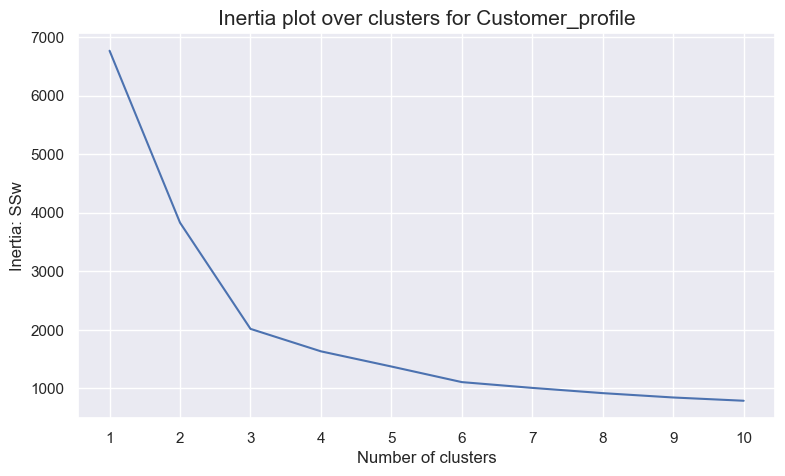

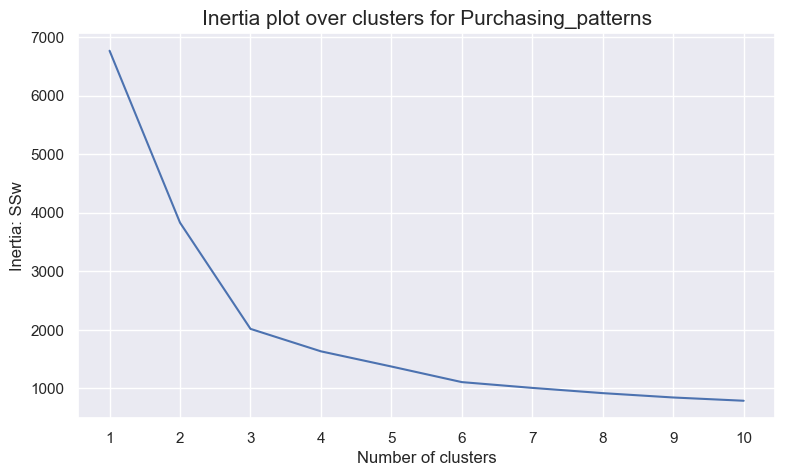

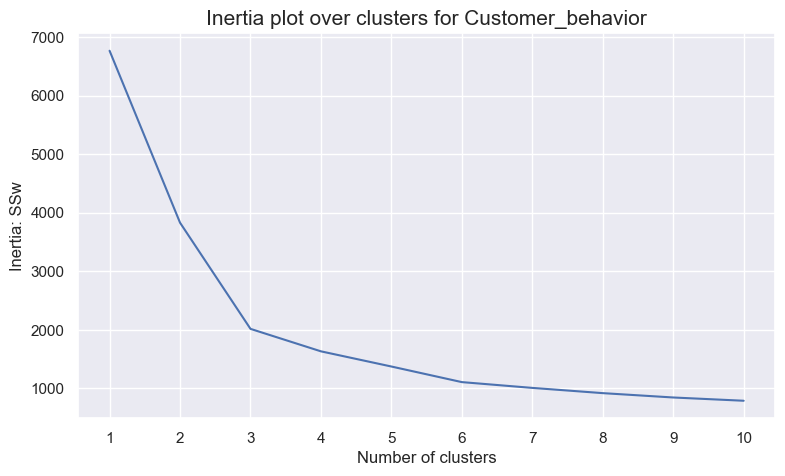

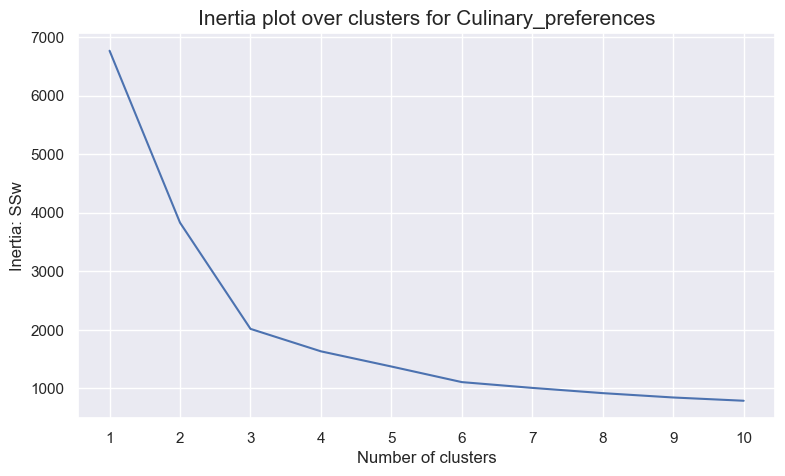

In [14]:
# Loop through the items in the 'categories' dictionary
for category, features in categories.items():
    # Initialize an empty list to store the inertia values for each clustering
    inertia = []
    
    # Define the range of cluster numbers to test (from 1 to 10)
    range_clusters = range(1, 11)
    
    # Iterate over the specified range of cluster numbers (n_clusters)
    for n_clus in range_clusters:
        # Initialize the KMeans clustering with the current number of clusters
        kmclust = KMeans(n_clusters=n_clus, init='random', n_init=15, random_state=1)
        
        # Fit the KMeans model to the data for the current category
        kmclust.fit(df[Customer_profile])
        
        # Append the inertia value (sum of squared distances of samples to their centroids)
        # for the current clustering solution to the inertia list
        inertia.append(kmclust.inertia_)
    
    # Create a plot to visualize the inertia values across different cluster numbers

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(9, 5))
    
    # Plot the inertia values against the range of cluster numbers
    ax.plot(range_clusters, inertia)
    
    # Set the x-axis ticks to correspond to the cluster numbers
    ax.set_xticks(range_clusters)
    
    # Label the y-axis as "Inertia: SSw" (sum of squared within-cluster distances)
    ax.set_ylabel("Inertia: SSw")
    
    # Label the x-axis as "Number of clusters"
    ax.set_xlabel("Number of clusters")
    
    # Set the title of the plot to include the category name
    ax.set_title(f"Inertia plot over clusters for {category}", size=15)

    # Display the plot
    plt.show()


After analyzing all the plots, we firmly conclude that the optimal number of clusters across all groups lies between **three and four**, with a strong preference for **four**. To confirm this, we tested various parameters for Customer_profile to see if there was any improvement.

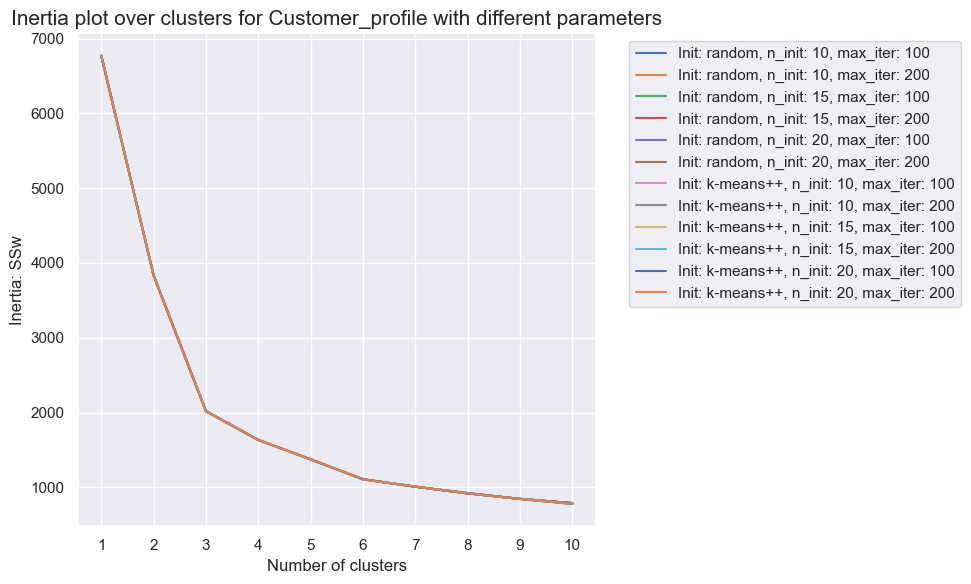

In [78]:
# Variables to store results
results = []
range_clusters = range(1, 11)  # Range of clusters to test

# Lists of parameters to test
inits = ['random', 'k-means++']
n_inits = [10, 15, 20]
max_iters = [100, 200]

# Loop to iterate over different parameters
for init_method in inits:
    for n_init_val in n_inits:
        for max_iter_val in max_iters:
            inertia = []  # List to store inertia values for different clusters
            for n_clus in range_clusters:
                # Create and fit the KMeans model
                kmclust = KMeans(
                    n_clusters=n_clus,
                    init=init_method,
                    n_init=n_init_val,
                    max_iter=max_iter_val,
                    random_state=1
                )
                kmclust.fit(df[Customer_profile])
                inertia.append(kmclust.inertia_)  # Save the inertia
                
            # Save the results in a list
            results.append({
                'init': init_method,
                'n_init': n_init_val,
                'max_iter': max_iter_val,
                'inertia': inertia
            })

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the inertia curves for each combination of parameters
for result in results:
    label = f"Init: {result['init']}, n_init: {result['n_init']}, max_iter: {result['max_iter']}"
    ax.plot(range_clusters, result['inertia'], label=label)

ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters for Customer_profile with different parameters", size=15)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()
plt.show()


After analyzing the graphic, we conclude that other parameters did not influence our choice for the number of clusters, which remains at **four**.

<a class="anchor" id="section_4_1">
    
## 4.1  Customer profile Perspective
    
</a>

In [80]:
customer_profile_characterization = characterize_clusters(Customer_profile, df['Customer_profile_cluster'], df)

# Display the results
print("Customer Profile Clusters Characterization:")
customer_profile_characterization

BD index for this solution:  0.7353979771399808
Silhouette score for this solution:  0.47972625207353076
Customer Profile Clusters Characterization:


customer_age  first_order  last_order  dif_order
labels                                                  
0           0.190212     0.211586    0.332727   0.293774
1           0.191963     0.154626    0.852442   0.757173
2           0.193176     0.673273    0.802319   0.300126

**Differences along the columns:**


__`Customer_age:`__ Across all clusters, the customer age does not differ, indicating that age is not a relevant feature for the clustering method.

__`first_order:`__  There is a slight decrease in the timing of first orders between cluster 0 and cluster 1, indicating that customers in cluster 1 placed their first orders earlier than those in cluster 0. In contrast, cluster 2 shows an increase compared to both clusters 1 and 0, suggesting that customers in cluster 2 start their purchases later than those in the other two clusters.

__`last_order:`__ Compared to cluster 0, clusters 1 and 2 show a significant increase, indicating that these customers placed their last orders later than those in cluster 0.

__`dif_order:`__  Cluster 0 shows the lowest value, indicating that its customers are the most regular compared to those in clusters 1 and 2. However, the difference between clusters 0 and 2 is minor, suggesting that customers in cluster 2 can also be regarded as fairly regular.


**Conclusions:**


- __`Cluster 0:`__ Although it has the lowest value in dif_order, the last_order was also small. This suggests that these customers might have been regular buyers for a while but are now considered inactive users, or they may have made only a few early purchases.

- __`Cluster 1:`__ The customers in this cluster have the highest values in last_order but the lowest in first_order, indicating that they start making purchases early and remain active users. These customers are more likely reactivated or loyal regulars.

- __`Cluster 2:`__ These customers have the highest values in last_order and first_order. This means they start purchasing later but remain active users. They are more likely to be new or reactivated customers.


<a class="anchor" id="section_4_2">
    
## 4.2  Purchasing Patterns Perspective
    
</a>

In [81]:
purchasing_patterns_characterization = characterize_clusters(Purchasing_patterns, df['Purchasing_patterns_cluster'], df)

# Display the results

print("\nPurchasing Patterns Clusters Characterization:")
purchasing_patterns_characterization

BD index for this solution:  0.9290311359606013
Silhouette score for this solution:  0.49726365031471165

Purchasing Patterns Clusters Characterization:


tot_work_days  tot_leisure_days
labels                                 
0            0.044286          0.039504
1            0.383413          0.216985
2            0.161999          0.096267

**Differences along the columns:**


__`tot_work_days:`__ Cluster 1 has a higher value, indicating that customers in this cluster make more purchases on workdays compared to customers in clusters 0 and 2.

__`tot_leisure_days:`__  The same observation in tot_work_days can be applied to leisure days.


**Conclusions:**

- __`Cluster 0:`__ The customers in this cluster have the lowest values for workdays and leisure days, which may indicate that they are inactive or only occasional buyers.
  
- __`Cluster 1:`__ In contrast to cluster 0, customers in this cluster have the highest values for both workdays and leisure days. However, the values for workdays are slightly higher, suggesting that they are more frequently engaged on these days. It appears that they are more likely to be professionals or business-oriented consumers.

- __`Cluster 2:`__ The customers in this cluster purchase occasionally but less frequently than the customers in cluster 1. It appears that they might represent casual shoppers.

<a class="anchor" id="section_4_3">
    
## 4.3  Customer Behavior Perspective
    
</a>

In [82]:
customer_behavior_characterization = characterize_clusters(Customer_behavior, df['Customer_behavior_cluster'], df)

# Display the results

print("\nCustomer Behavior Clusters Characterization:")
customer_behavior_characterization

BD index for this solution:  1.4594443418926522


Silhouette score for this solution:  0.4069674974025588

Customer Behavior Clusters Characterization:


tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
labels                                                               
0                0.023298       0.030026   0.032438       0.022801   
1                0.002627       0.035024   0.053485       0.227277   
2                0.025850       0.111980   0.242006       0.062125   

        tot_dinner  tot_late_night  
labels                              
0         0.024386        0.009098  
1         0.062123        0.006078  
2         0.096458        0.023627

**Conclusions:**

- __`Cluster 0:`__ This cluster represents customers with extremely low activity throughout the day. Their ordering behavior is minimal across all time periods, indicating very limited engagement with the service.
  
- __`Cluster 1:`__ Customers in this cluster also display relatively low values in most categories, except for the afternoon, where activity is significantly higher. This pattern suggests that these customers primarily place orders in the afternoon, likely due to busy schedules during other times. Their behavior may reflect habits such as late lunches, snacks, or early dinners.
  
- __`Cluster 2:`__ This cluster exhibits higher values in the morning category compared to the others, which show very low activity during this time. This indicates that customers in this group have a stronger preference for placing orders in the morning, making them notable consumers during this time of day.

<a class="anchor" id="section_4_4">
    
## 4.4  Culinary Preferences Perspective
    
</a>

In [83]:
culinary_preferences_characterization = characterize_clusters(Culinary_preferences, df['Culinary_preferences_cluster'], df)

# Display the results

print("\nCulinary Preferences Clusters Characterization:")
culinary_preferences_characterization

BD index for this solution:  1.0639980526801185


Silhouette score for this solution:  0.37409986237268505

Culinary Preferences Clusters Characterization:


tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
labels                                                                    
0                   0.047750               0.059841            0.042233   
1                   0.101448               0.144287            0.119568   
2                   0.029241               0.038873            0.021576   

        purchased_cuisines   tot_CUI  
labels                                
0                 0.386873  0.069965  
1                 0.733280  0.167178  
2                 0.164703  0.042658

**Conclusions:**

- __`Cluster 0:`__ The customers in this cluster show that they rarely purchase food from any cuisine category. However, among all cuisine types, the oriental cuisine was the most frequently purchased, though still at lower values compared to other clusters.

- __`Cluster 1:`__ Consumers in this cluster display more balanced values across all cuisine categories, with a slight preference for oriental cuisines. This group stands out for its high value in the purchased_cuisines variable, indicating that these customers explore a wide variety of options and are generally more consistent in using the service or place larger orders. These characteristics suggest that this represents the most engaged and exploratory consumers.
  
- __`Cluster 2:`__ This cluster exhibits extremely low values across all cuisine categories, even lower than those observed in Cluster 0. It groups consumers with nearly nonexistent ordering behavior, making it the extreme in terms of minimal order frequency.

<div class="alert alert-block alert-success">
<a class="anchor" id="section_5">
    
# 5. Self-Organization Maps

[Back to ToC](#toc)

    
</a>
<div>

## Self-Organizing Map (SOM) Grid Configuration

SOM organizes data in an **unsupervised manner**, mapping it onto a grid of predefined dimensions. This grid enables the grouping of similar data points into clusters.

###  **Setting the SOM Grid Dimensions**
The size of the grid is a crucial parameter, as it defines the number of potential "clusters" in the map. 

#### **Heuristic Rule for Grid Dimensions:**
The optimal grid size can be determined using the following formula:

Where **N** is the total number of data points in the dataset.

## Purpose of Self-Organizing Maps (SOM)

Self-Organizing Maps (SOM) serve as a powerful data visualization technique designed to interpret and simplify high-dimensional data. By reducing the dimensionality of the data, SOM maps complex relationships into a 2D grid, making it easier to understand patterns and structures.

### Key Features of SOM:
- **Dimensionality Reduction**: 
  - SOM simplifies high-dimensional data by mapping it onto a lower-dimensional space while preserving the relationships and similarities among data points.
  
- **Clustering Representation**: 
  - It inherently groups similar data points together, visualizing clusters and highlighting natural groupings within the dataset.



In [84]:
categories = {
    'Customer_profile': ['customer_age', 'first_order', 'last_order', 'dif_order'],
    'Purchasing_patterns': ['tot_work_days', 'tot_leisure_days'],
    'Customer_behavior': ['tot_early_morning', 'tot_breakfast', 'tot_lunch', 'tot_afternoon', 'tot_dinner', 'tot_late_night'],
    'Culinary_preferences': ['tot_western_cuisines', 'tot_oriental_cuisines', 'tot_other_cuisines', 'purchased_cuisines', 'tot_CUI']
}

# General SOUND configuration
M, N = 10, 10  
neighborhood_function = 'gaussian'
topology = 'hexagonal'
learning_rate = 0.7
random_seed = 42


for category, features in categories.items():
    print(f"\nTraining SOM for the category: {category}")
    
    
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid metrics found for {category}. Jumping...")
        continue

  
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Initialize and train SOM
    sm = MiniSom(M, N, n_feats, 
                 learning_rate=learning_rate, 
                 topology=topology, 
                 neighborhood_function=neighborhood_function, 
                 activation_distance='euclidean', 
                 random_seed=random_seed)

    sm.random_weights_init(som_data)

    # Before training
    print("Before training:")
    print("QE:", np.round(sm.quantization_error(som_data), 4))
    print("TE:", np.round(sm.topographic_error(som_data), 4))

    # SOM training
    sm.train_batch(som_data, 20000)

    # After training
    print(" After training:")
    print("QE:", np.round(sm.quantization_error(som_data), 4))
    print("TE:", np.round(sm.topographic_error(som_data), 4))



Training SOM for the category: Customer_profile
Before training:
QE: 0.0843


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.9096
 After training:
QE: 0.2419
TE: 0.2807

Training SOM for the category: Purchasing_patterns
Before training:
QE: 0.0108


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.985
 After training:
QE: 0.0039
TE: 0.0126

Training SOM for the category: Customer_behavior
Before training:
QE: 0.0459
TE: 0.9473
 After training:
QE: 0.0364
TE: 0.2294

Training SOM for the category: Culinary_preferences
Before training:
QE: 0.0493


c:\Users\rcouc\anaconda3\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


TE: 0.9521
 After training:
QE: 0.0406
TE: 0.2342


**Customer_profile:**
The initial `QE` is low, indicating that the data were reasonably well represented at initialization. However, the relatively high `TE` suggests that the relationships between the data are not being accurately reflected. After training, the `QE` increased, which may indicate that the model did not converge properly, while the `TE` decreased significantly, showing that the topology was better preserved in the end.

**Purchasing_patterns:**
The values before training suggest a good initial approximation, but again, the topology is not well preserved. After training, the `QE` decreased significantly, indicating that the model was effective in representing the data. Additionally, the low `TE` value confirms that the topology was well preserved.


**Customer_behavior:**
 The `QE` slightly decreased after training, suggesting a small improvement in data representation. The `TE` showed a significant improvement, indicating that the SOM was able to preserve the spatial relationships of the data much better during training.


**Culinary_preferences:**
The `QE` slightly decreased after training, indicating a small improvement in data representation. Similarly, the `TE` improved considerably, showing that the SOM was able to preserve the spatial relationships of the data effectively

In [85]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(10, 10, 5)

In [86]:
def plot_hexagons(som,              
                  sf,               
                  colornorm,        
                  matrix_vals,      
                  label="",        
                  cmap=cm.viridis,  
                  annot=False):     
    
    axs = sf.subplots(1, 1)  # Create a subplot
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):
            wx, wy = som.convert_map_to_euclidean((i, j))
            hex = RegularPolygon(
                (wx, wy),
                numVertices=6,
                radius=np.sqrt(1/3),
                facecolor=cmap(colornorm(matrix_vals[i, j])),
                alpha=1,
                edgecolor='white',
                linewidth=.5
            )
            axs.add_patch(hex)
            if annot:
                annot_val = np.round(matrix_vals[i, j], 2)
                axs.text(wx, wy, annot_val, ha='center', va='center', fontsize='x-small')
    
    axs.margins(0.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)
    
    # Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad=0.05)
    cmap_sm = cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cb1 = colorbar.Colorbar(ax_cb, mappable=cmap_sm, orientation='vertical')
    cb1.ax.get_yaxis().labelpad = 6
    sf.add_axes(ax_cb)
    
    return sf



Viewing SOM for the category: Customer_profile


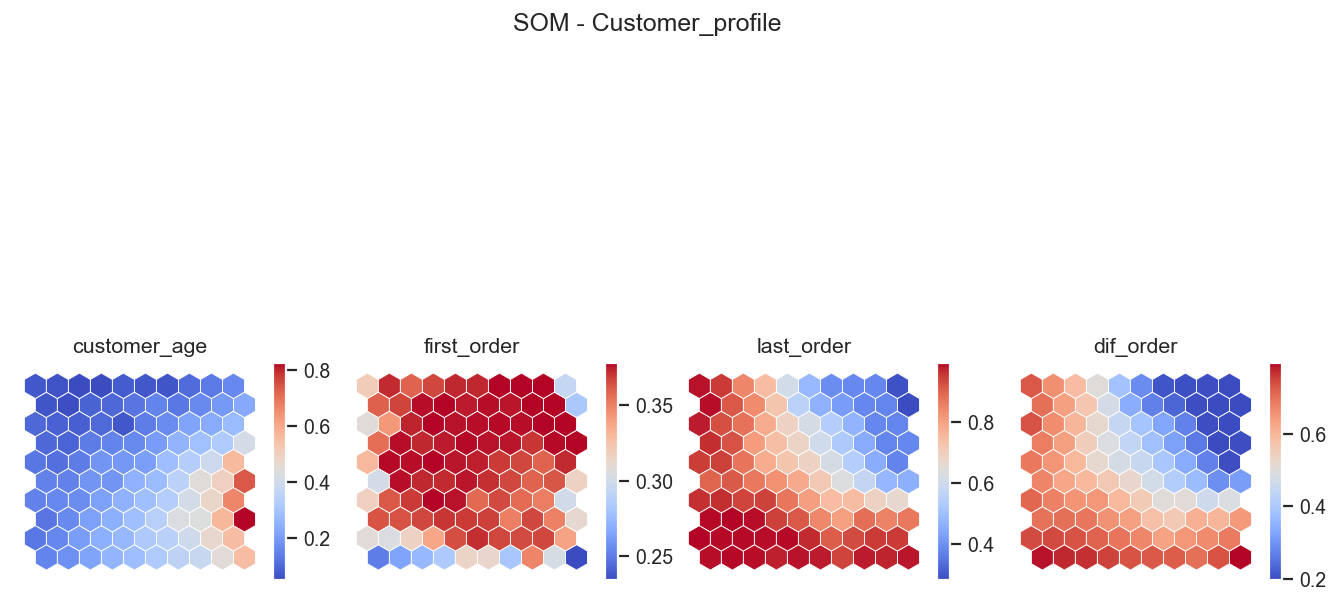


Viewing SOM for the category: Purchasing_patterns


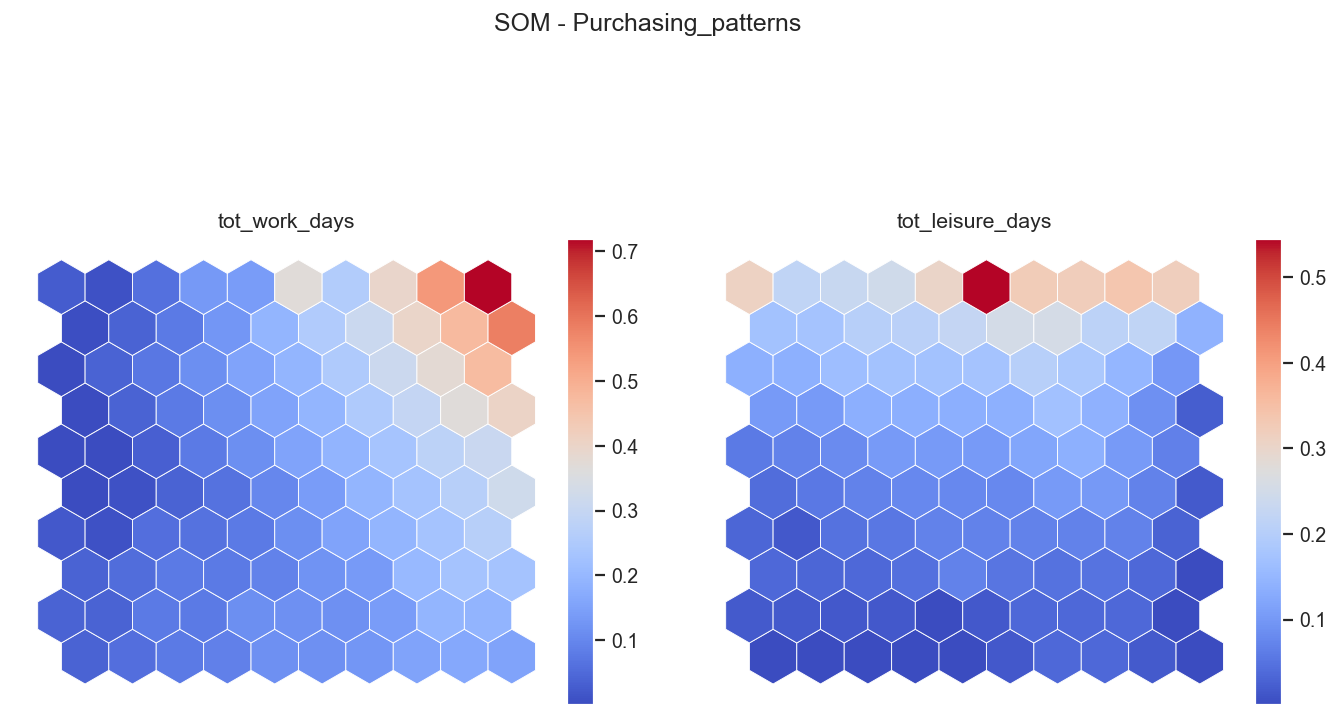


Viewing SOM for the category: Customer_behavior


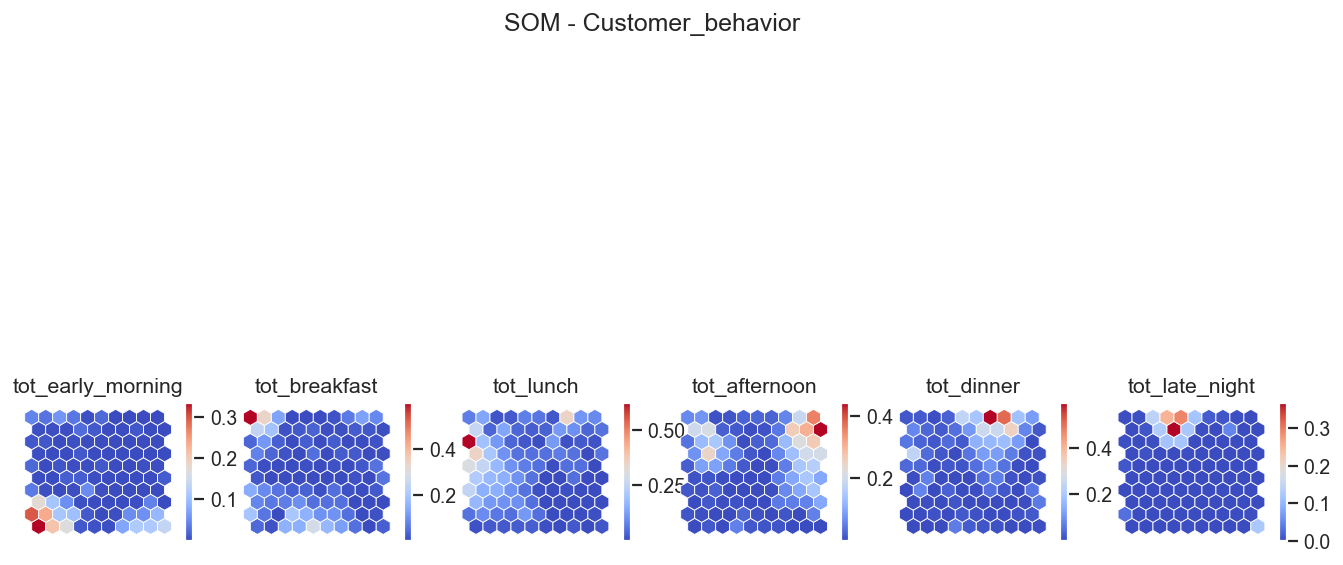


Viewing SOM for the category: Culinary_preferences


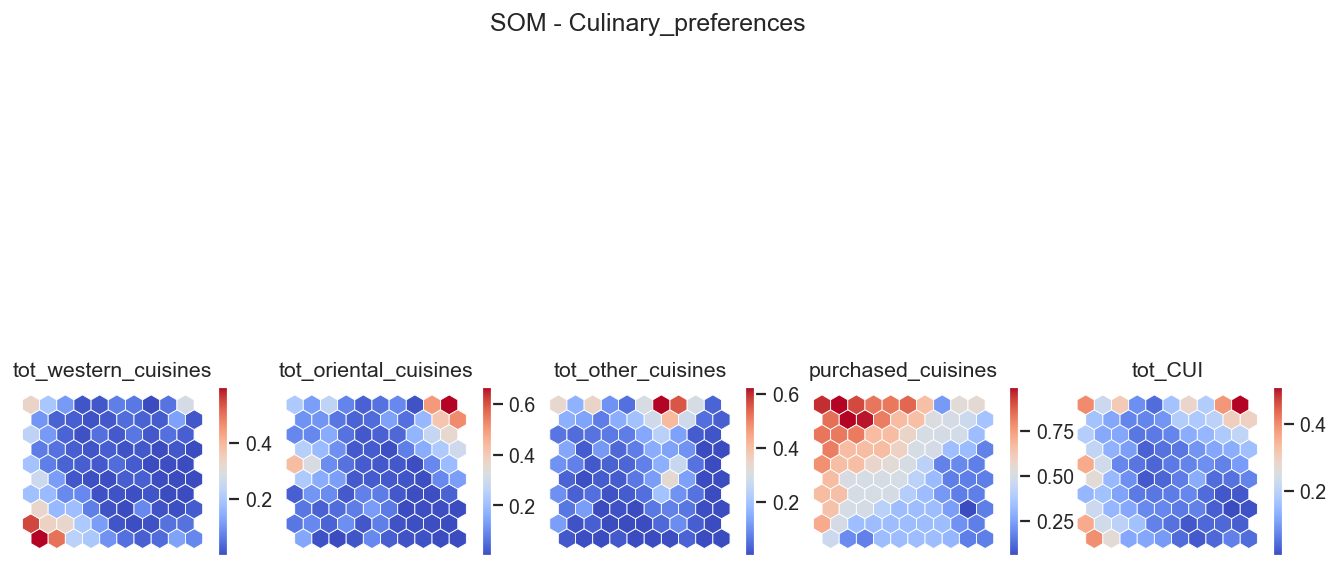

In [87]:
figsize = (10, 7)
dpi = 128
colormap = cm.coolwarm

# Iterate over categories
for category, features in categories.items():
    print(f"\nViewing SOM for the category: {category}")

   
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid metrics found for {category}")
        continue

    # Prepare data and train SOM
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Configure and train SOM
    sm = MiniSom(10, 10, n_feats, 
                 learning_rate=0.7, 
                 topology='hexagonal', 
                 neighborhood_function='gaussian', 
                 random_seed=42)
    sm.random_weights_init(som_data)
    sm.train_batch(som_data, 20000)

    # SOM weights for each metric
    weights = sm.get_weights()

    # Create figure for metrics in this category
    fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=dpi)
    subfigs = fig.subfigures(1, len(valid_features), wspace=0.15)

    # Iterate over metrics and create subgraphs
    for cpi, sf in zip(range(len(valid_features)), subfigs):
        matrix_vals = weights[:, :, cpi]  
        colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

        # Plot hexagons
        sf = plot_hexagons(sm, sf, 
                           colornorm,
                           matrix_vals,
                           label=valid_features[cpi],
                           cmap=colormap)

    
    fig.suptitle(f"SOM - {category}", fontsize=14)
    plt.show()


**Customer_profile:**
In the customer age category, there is a large blue region indicating that the majority of customers are young. In the first_order variable, there is a large red region showing that most groups are characterized by having made their first purchase more recently. In the bottom-right corner, there is a dark blue hexagon that could possibly represent an outlier. Most customers who had their last order closer to the beginning of the study correspond to those who had their first order more recently, which is contradictory. There is a group in the top-right corner representing customers who made both their first and last purchases at the start of the study, while in the bottom-left corner, there are customers with the largest difference between their first and last purchase.

**Purchasing_patterns:**
A large part of the region is blue, indicating that most customers do not place many orders, either during workdays or leisure days. The group with the highest number of purchases on workdays also corresponds to a group that makes a moderate number of orders on leisure days.

**Customer_behavior:**
There are clearly distinct groups regarding purchase times, as customers who buy at a certain time tend not to make many purchases at other times. From the blue tones, it is evident that tot early morning and tot late night are the time periods characterized by the most clusters of customers who do not make purchases during these hours.

**Culinary_preferences:**
There are also distinct groups for each type of cuisine, with customers who spend more on oriental and western cuisines being those with a higher tot_cui.




Generating U-matrix for category: Customer_profile


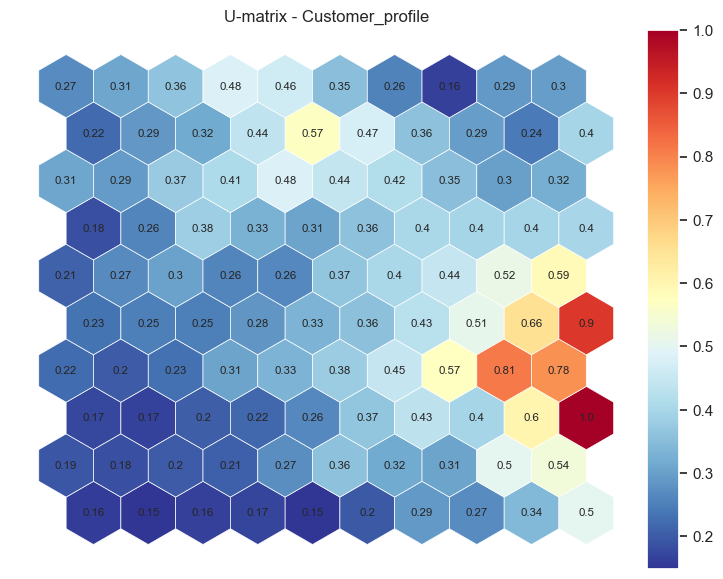


Generating U-matrix for category: Purchasing_patterns


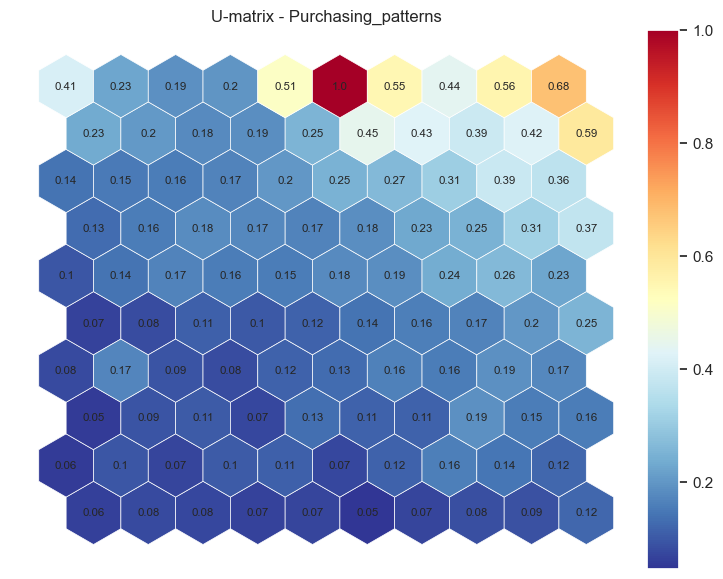


Generating U-matrix for category: Customer_behavior


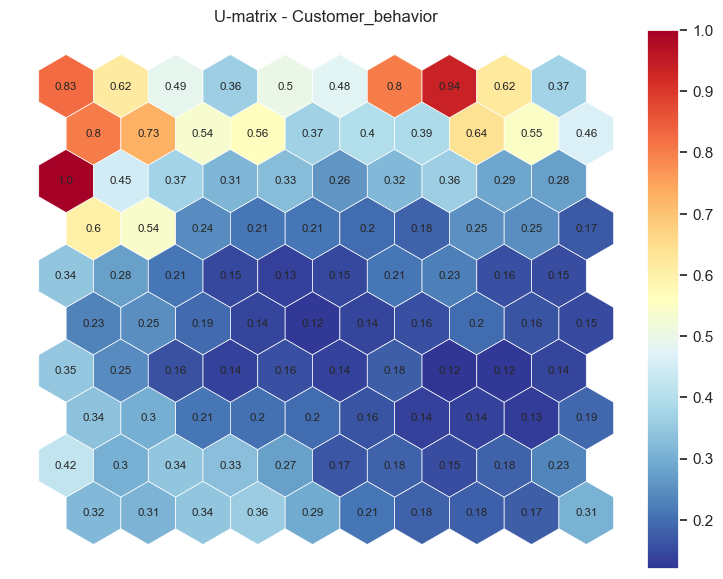


Generating U-matrix for category: Culinary_preferences


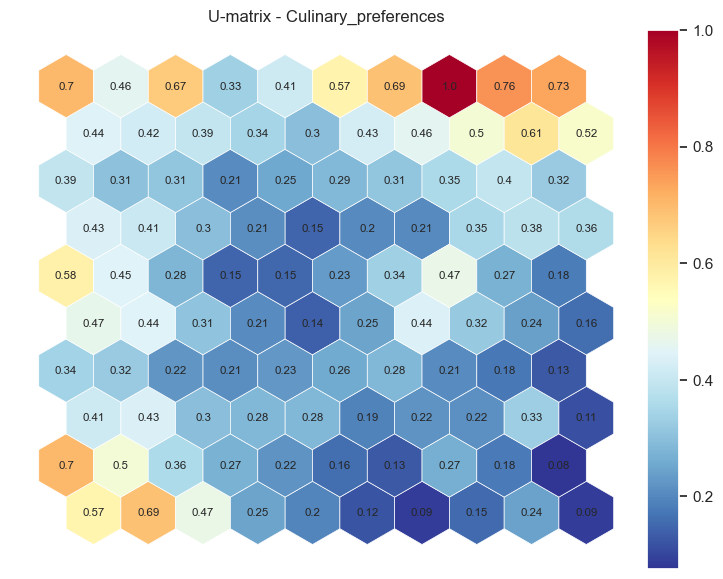

In [88]:
figsize = (10, 7)

# Iterate over categories
for category, features in categories.items():
    print(f"\nGenerating U-matrix for category: {category}")
    
    
    valid_features = [col for col in features if col in df.columns]
    if not valid_features:
        print(f"Attention: No valid resources found for {category}")
        continue

    # Prepare data and train SOM
    som_data = df[valid_features].values
    n_feats = len(valid_features)

    # Configure and train SOM
    sm = MiniSom(10, 10, n_feats, 
                 learning_rate=0.7, 
                 topology='hexagonal', 
                 neighborhood_function='gaussian', 
                 random_seed=42)
    sm.random_weights_init(som_data)
    sm.train_batch(som_data, 20000)

    # Calculate the U-matrix
    umatrix = sm.distance_map(scaling='mean')
    colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))
    

    fig = plt.figure(figsize=figsize)
    
    # Plot the U-matrix
    plot_hexagons(som=sm, 
                  sf=fig, 
                  colornorm=colornorm, 
                  matrix_vals=umatrix, 
                  label=f"U-matrix - {category}", 
                  cmap=cm.RdYlBu_r, 
                  annot=True)

    plt.show()


In [89]:
## Flip and rotate to match plot
print(np.flip(np.round(umatrix,2), axis=1).T)

[[0.7  0.46 0.67 0.33 0.41 0.57 0.69 1.   0.76 0.73]
 [0.44 0.42 0.39 0.34 0.3  0.43 0.46 0.5  0.61 0.52]
 [0.39 0.31 0.31 0.21 0.25 0.29 0.31 0.35 0.4  0.32]
 [0.43 0.41 0.3  0.21 0.15 0.2  0.21 0.35 0.38 0.36]
 [0.58 0.45 0.28 0.15 0.15 0.23 0.34 0.47 0.27 0.18]
 [0.47 0.44 0.31 0.21 0.14 0.25 0.44 0.32 0.24 0.16]
 [0.34 0.32 0.22 0.21 0.23 0.26 0.28 0.21 0.18 0.13]
 [0.41 0.43 0.3  0.28 0.28 0.19 0.22 0.22 0.33 0.11]
 [0.7  0.5  0.36 0.27 0.22 0.16 0.13 0.27 0.18 0.08]
 [0.57 0.69 0.47 0.25 0.2  0.12 0.09 0.15 0.24 0.09]]



Generating SOM Hits Map for category: Customer_profile


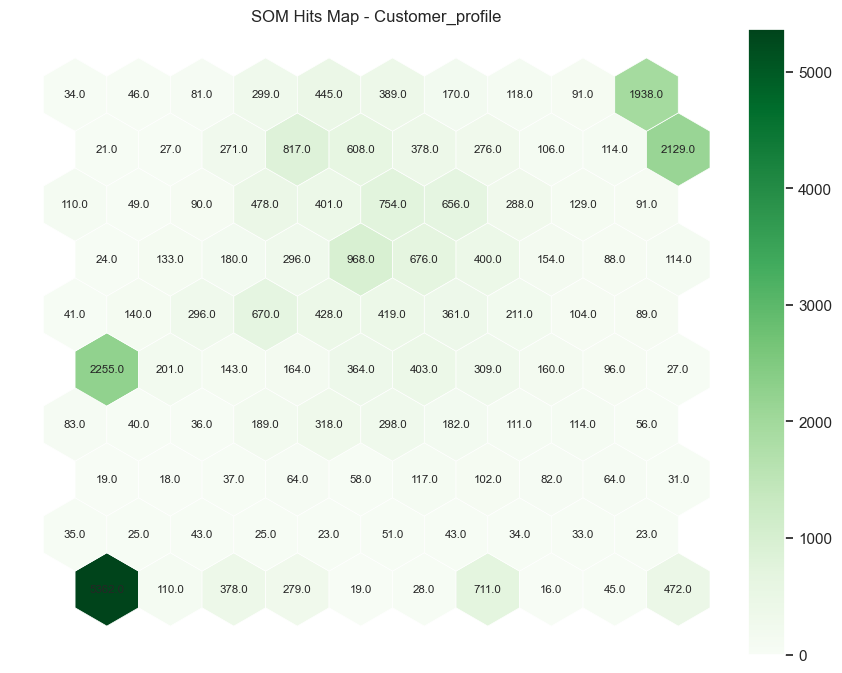


Generating SOM Hits Map for category: Purchasing_patterns


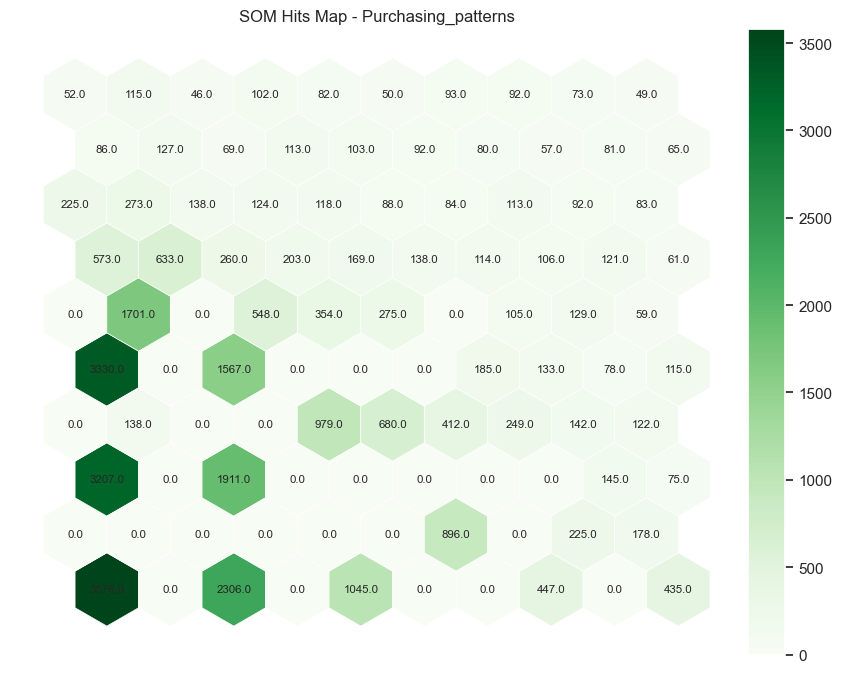


Generating SOM Hits Map for category: Customer_behavior


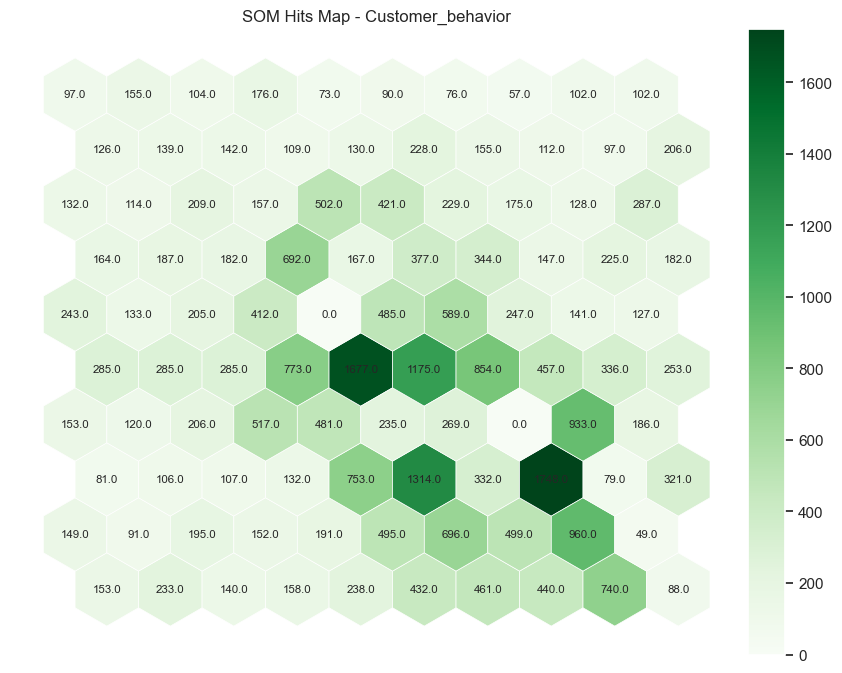


Generating SOM Hits Map for category: Culinary_preferences


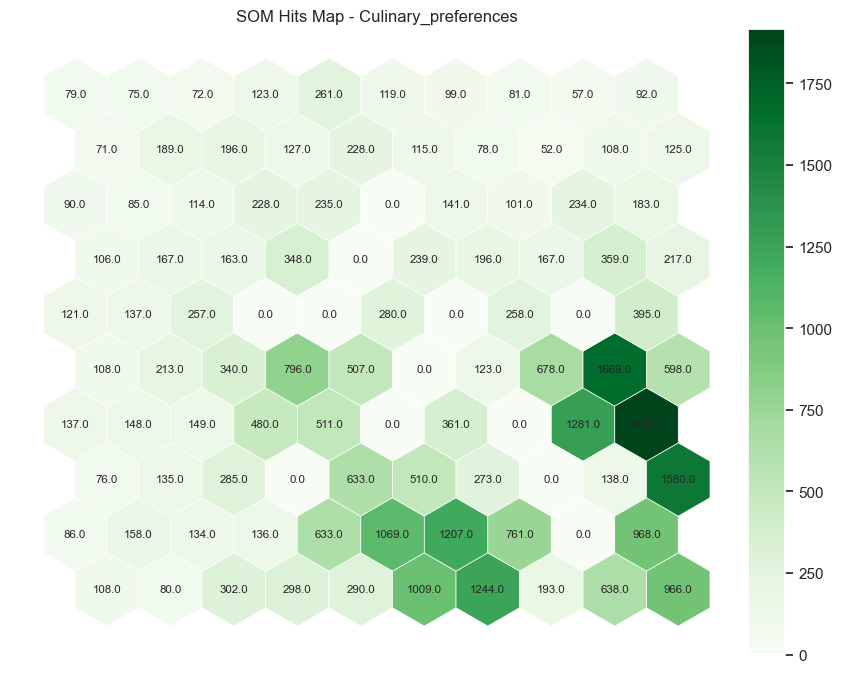

In [90]:
# Define the size of the figure for plotting (10x10 inches)
figsize = (10, 10)

# Loop through each category and its associated features in the 'categories' dictionary
for category, features in categories.items():
    print(f"\nGenerating SOM Hits Map for category: {category}")
    
    # Filter the features to ensure they exist in the dataframe columns
    valid_features = [col for col in features if col in df.columns]
    
    # If no valid features are found, notify the user and skip the rest of the process for this category
    if not valid_features:
        print(f"Attention: No valid resources found for {category}")
        continue  # Skip to the next category if no valid features are found

    # Prepare the data to train the Self-Organizing Map (SOM) using the valid features
    som_data = df[valid_features].values
    n_feats = len(valid_features)  # Number of features used for the SOM training

    # Configure the SOM (Self-Organizing Map)
    sm = MiniSom(10, 10, n_feats,  # 10x10 grid, with 'n_feats' number of features
                 learning_rate=0.7,  # Set the learning rate for training
                 topology='hexagonal',  # Use hexagonal grid topology
                 neighborhood_function='gaussian',  # Use Gaussian function for neighborhood
                 random_seed=42)  # Set a random seed for reproducibility

    # Initialize the weights of the SOM with the input data
    sm.random_weights_init(som_data)
    
    # Train the SOM with the input data for 20,000 iterations
    sm.train_batch(som_data, 20000)

    # Generate the hits matrix for the current category, indicating how many times each neuron was activated
    hitsmatrix = sm.activation_response(som_data)

    # Normalize the colors for visualization (normalize hitsmatrix values)
    colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

    # Create a new figure for plotting
    fig = plt.figure(figsize=figsize)

    # Plot the hexagonal grid hits map using the 'plot_hexagons' function
    fig = plot_hexagons(
        som=sm,  # The trained SOM
        sf=fig,  # The figure object
        colornorm=colornorm,  # Normalized color range
        matrix_vals=hitsmatrix,  # The hits matrix
        label=f"SOM Hits Map - {category}",  # Label for the map
        cmap=cm.Greens,  # Colormap to use for the plot
        annot=True  # Show annotations on the map (i.e., display values on the grid)
    )

    # Display the generated plot
    plt.show()



In [91]:
## Values of HITS:
## Flip and rotate to match plot
np.flip(np.round(hitsmatrix,2), axis=1).T

array([[  79.,   75.,   72.,  123.,  261.,  119.,   99.,   81.,   57.,
          92.],
       [  71.,  189.,  196.,  127.,  228.,  115.,   78.,   52.,  108.,
         125.],
       [  90.,   85.,  114.,  228.,  235.,    0.,  141.,  101.,  234.,
         183.],
       [ 106.,  167.,  163.,  348.,    0.,  239.,  196.,  167.,  359.,
         217.],
       [ 121.,  137.,  257.,    0.,    0.,  280.,    0.,  258.,    0.,
         395.],
       [ 108.,  213.,  340.,  796.,  507.,    0.,  123.,  678., 1669.,
         598.],
       [ 137.,  148.,  149.,  480.,  511.,    0.,  361.,    0., 1281.,
        1915.],
       [  76.,  135.,  285.,    0.,  633.,  510.,  273.,    0.,  138.,
        1580.],
       [  86.,  158.,  134.,  136.,  633., 1069., 1207.,  761.,    0.,
         968.],
       [ 108.,   80.,  302.,  298.,  290., 1009., 1244.,  193.,  638.,
         966.]])

<div class="alert alert-block alert-success">
<a class="anchor" id="section_6">
    
# 6. DBSCAN
    
[Back to ToC](#toc)

</a>
<div>

In [92]:
def neighbors_dist (df, n_neighbors):
    """
    Plots the distance to the nearest neighbors for a dataset.

    This function uses the `NearestNeighbors` algorithm from the `sklearn` library to compute the distance to the nearest neighbors of each point in the provided dataset. 
    The resulting plot helps identify the density of the data based on the distance between points, which can be useful for determining an appropriate value for the `min_pts`
    parameter (minimum number of points) in methods like DBSCAN.

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset with points for which the distances to the nearest neighbors will be computed.
        Each row represents a point, and each column represents a feature (or dimension).
    
    n_neighbors : int
        The number of neighbors to consider for each point. It is typically a multiple of the number of features in the dataset (e.g., 2 * number of features).
    """

    # Initialize the NearestNeighbors algorithm
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    
    # Fit the model and compute the distances and indices
    neighbors.fit(df)
    distances, _ = neighbors.kneighbors(df)
    
    # Sort the distances and exclude the last column (which is always the point itself)
    distances = np.sort(distances[:, -1])
    # Plot the sorted distances
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance to nearest neighbor")
    plt.title(f"Distance to {n_neighbors} Nearest Neighbors")
    plt.show()


In [93]:
def perform_dbscan_labels(df, eps, min_samples, n_jobs=4):
    """
    Performs DBSCAN clustering on the provided dataset and returns the cluster labels.

    This function applies the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
    algorithm to a dataset, which groups points into clusters based on their density. 
    It returns the labels of the clusters, where each point is assigned a label indicating its cluster 
    (or -1 for noise points).

    Parameters:
    -----------
    df : pandas.DataFrame or numpy.ndarray
        The dataset on which DBSCAN clustering will be performed. Each row represents a data point, 
        and each column represents a feature (or dimension).
    
    eps : float
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    
    min_samples : int
        The number of samples in a neighborhood for a point to be considered as a core point. 
        This is also the minimum number of points required to form a dense region (cluster).
    
    n_jobs : int
        The number of CPU cores to use during the computation. If -1, all cores are used.

    Returns:
    --------
    dbscan_labels : numpy.ndarray
        An array containing the labels for each point. Points that are part of a cluster are assigned 
        a non-negative integer label, while noise points are labeled as -1.
    
    """
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=n_jobs)
    dbscan_labels = dbscan.fit_predict(df)
    
    # Return the cluster labels
    return dbscan_labels




In [94]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

<div >
<a class="anchor" id="section_6_1">
    
## 6.1 Customer profile Perspective
    
</a>
<div>

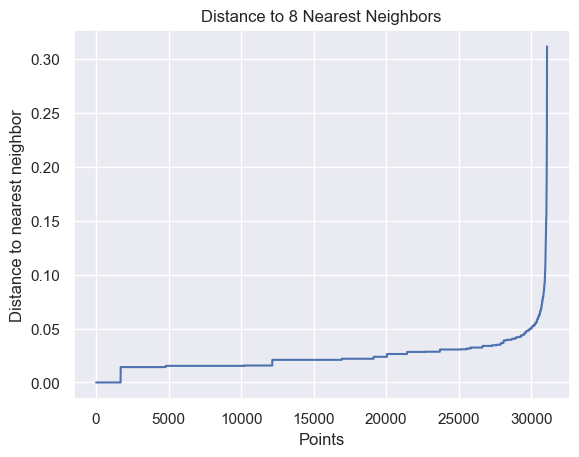

In [95]:
neighbors_dist(df_selected_1,8) # n_neighbors = 2* nº metric features (min_pts)

In [96]:
dbscan_labels= perform_dbscan_labels(df_selected_1,0.05,8,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [97]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_1, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

customer_age  first_order  last_order  dif_order  dbscan_labels
customer_id                                                                 
1b8f824d5e       0.046154          0.0    0.011111   0.205357              0
5d272b9dcb       0.030769          0.0    0.011111   0.205357              0
f6d1b2ba63       0.353846          0.0    0.011111   0.205357              0
180c632ed8       0.169231          0.0    0.022222   0.214286              0
4eb37a6705       0.076923          0.0    0.022222   0.214286              0

In [98]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

customer_age  first_order  last_order  dif_order  dbscan_labels
customer_id                                                                 
f49ed5489a       0.553846     0.000000    0.044444   0.232143             -1
eb13ad08ad       0.492308     0.000000    0.055556   0.241071             -1
b92ab1eeec       0.492308     0.000000    0.066667   0.250000             -1
afc96f7eaa       0.415385     0.000000    0.111111   0.285714             -1
9aadcc2e76       0.353846     0.000000    0.133333   0.303571             -1
...                   ...          ...         ...        ...            ...
20c90aaf32       0.615385     0.244444    0.000000   0.000000             -1
4ff94a6987       0.692308     0.244444    0.000000   0.000000             -1
78c778a850       0.430769     0.244444    0.000000   0.000000             -1
a6e5d1d813       0.430769     0.244444    0.000000   0.000000             -1
b32f05f979       0.553846     0.244444    0.000000   0.000000             -1

[614 rows x 5 columns]

In [99]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_1)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0407


C:\Users\rcouc\AppData\Local\Temp\ipykernel_12532\3396358789.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


The value of R2 is very low

In [100]:
df_concat.groupby('dbscan_labels').mean()

customer_age  first_order  last_order  dif_order
dbscan_labels                                                  
-1                 0.556903     0.346254    0.666884   0.454077
 0                 0.184238     0.322001    0.705065   0.504247
 1                 0.442308     0.011111    0.533333   0.616071
 2                 0.503297     0.184127    0.777778   0.673469
 3                 0.459615     0.348611    0.644444   0.434152
 4                 0.436538     0.545833    0.761111   0.369420
 5                 0.192154     0.244444    0.000000   0.000000

**Conclusions:**
- __`Cluster -1:`__ Generally represents the points considered as outliers by DBSCAN (614 rows). It is characterized by older customers who made their first purchase some time ago but remained active until closer to the end of the study.
  
- __`Cluster 0:`__ Younger customers who started purchasing relatively early and maintained some recent activity. They can be considered customers with consistent engagement over time.
  
- __`Cluster 1:`__ Long-standing customers who made their first purchase in the early days of the dataset but have no recent purchases. They are possibly "dormant" customers or those with low recurrence.
  
- __`Cluster 2:`__ Customers with an older purchase history who have recently resumed buying. These represent a profile of customers returning after a period of inactivity.
  
- __`Cluster 3:`__ Customers with balanced behavior. They started purchasing at an intermediate point and have moderate recent activity.
  
- __`Cluster 4:`__ More recent customers in the purchase history who show good recent activity. They represent new, engaged customers.
  
- __`Cluster 5:`__ Customers who made only one purchase and did not return. This group requires attention to improve retention and encourage repeat purchases.

In [101]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_1, dbscan_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_1,dbscan_labels))

BD index for this solution:  2.1786218353292326
Silhouette score for this solution:  -0.3449233247514681


<div >
<a class="anchor" id="section_6_2">
    
## 6.2  Purchasing Patterns Perspective
    
</a>
<div>

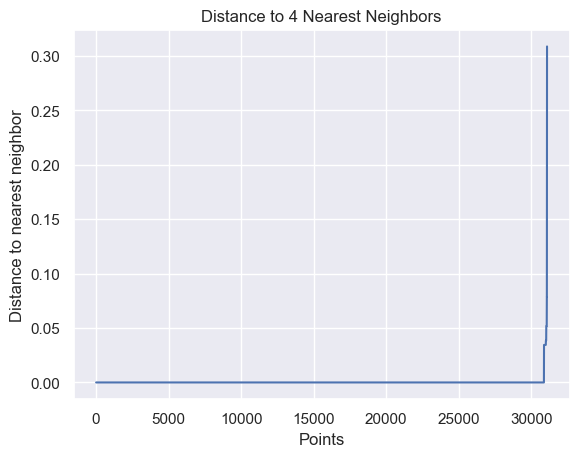

In [102]:
neighbors_dist(df_selected_2,4) # n_neighbors = 2* nº metric features (min_pts)

In [103]:
dbscan_labels= perform_dbscan_labels(df_selected_2,0.05,4,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 7


In [ ]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_2, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

tot_work_days  tot_leisure_days  dbscan_labels
customer_id                                                
1b8f824d5e        0.000000          0.068966              0
5d272b9dcb        0.000000          0.068966              0
f6d1b2ba63        0.000000          0.068966              0
180c632ed8        0.038462          0.034483              0
4eb37a6705        0.038462          0.034483              0

In [ ]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

tot_work_days  tot_leisure_days  dbscan_labels
customer_id                                                
eb4664b1ac        0.307692          0.586207             -1
36269ce6f1        0.576923          0.517241             -1
be810296f1        0.307692          0.965517             -1
4a973fe7df        0.076923          0.827586             -1
bdea2df96b        0.384615          0.620690             -1
e5fb8d261a        0.769231          0.758621             -1
89ebb923a9        0.846154          0.655172             -1
9fe492b40e        0.576923          0.758621             -1
63051af585        0.923077          0.586207             -1
184267f115        0.538462          0.655172             -1
9e2e36d918        0.538462          0.586207             -1
b12bc240e2        1.000000          0.586207             -1
b414c0bd36        0.384615          0.724138             -1
d901bfed66        0.846154          0.413793             -1
7d7760c49e        0.115385          0.448276             -1
c62a7558e4        0.653846          0.586207             -1
f7706ccb45        0.615385          0.517241             -1
b08ecbd6a2        0.692308          0.620690             -1
780cbead1f        0.769231          0.413793             -1
dad7b1926a        0.730769          0.103448             -1
d82b2a107b        0.807692          0.482759             -1
0c90fcc4b1        0.653846          0.586207             -1
fe486c94dc        0.615385          0.034483             -1
10d6327e01        0.269231          0.655172             -1
51f78e61c5        0.576923          0.551724             -1
189624e403        0.615385          0.620690             -1
23d2627c3b        0.615385          0.448276             -1
3893f85418        0.846154          0.206897             -1
cb19afa26c        0.730769          0.344828             -1
1309257334        0.807692          0.137931             -1
cf1ac654cb        0.730769          0.344828             -1
27092dfeb0        0.576923          1.000000             -1

In [ ]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_2)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0770


C:\Users\rcouc\AppData\Local\Temp\ipykernel_12532\3837483258.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


The value of R2 is very low

In [107]:
df_concat.groupby('dbscan_labels').mean()

tot_work_days  tot_leisure_days
dbscan_labels                                 
-1                  0.609375          0.542026
 0                  0.083449          0.058773
 1                  0.692308          0.462069
 2                  0.807692          0.370690
 3                  0.346154          0.543103
 4                  0.701923          0.051724
 5                  0.871795          0.310345

In [107]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_2, dbscan_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_2,dbscan_labels))

BD index for this solution:  1.3373354554469654
Silhouette score for this solution:  0.7569501995546835


<div >
<a class="anchor" id="section_6_3">
    
## 6.3  Customer Behavior Perspective
    
</a>
<div>

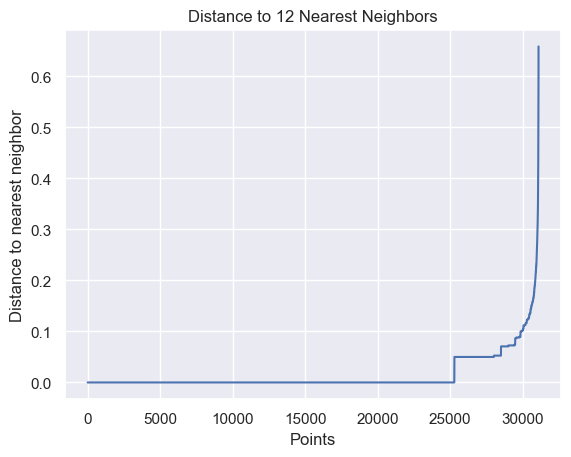

In [108]:
neighbors_dist(df_selected_3,12)

In [109]:
dbscan_labels= perform_dbscan_labels(df_selected_3,0.1,12,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 6


In [110]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_3, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
customer_id                                                               
1b8f824d5e                 0.0           0.00   0.000000            0.0   
5d272b9dcb                 0.0           0.05   0.052632            0.0   
f6d1b2ba63                 0.0           0.05   0.052632            0.0   
180c632ed8                 0.0           0.00   0.105263            0.0   
4eb37a6705                 0.0           0.10   0.000000            0.0   

             tot_dinner  tot_late_night  dbscan_labels  
customer_id                                             
1b8f824d5e          0.1             0.0              0  
5d272b9dcb          0.0             0.0              0  
f6d1b2ba63          0.0             0.0              0  
180c632ed8          0.0             0.0              0  
4eb37a6705          0.0             0.0              0

In [111]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
customer_id                                                               
9c5d8d6747            0.000000           0.00   0.315789           0.10   
a5347d72ea            0.105263           0.00   0.052632           0.05   
4d43db4f0a            0.000000           0.05   0.789474           0.15   
4a23e440a8            0.000000           0.00   0.000000           0.00   
d6e5be6382            0.000000           0.00   0.210526           0.30   
...                        ...            ...        ...            ...   
fbf93610a0            0.000000           0.05   0.000000           0.05   
fc2816f615            0.000000           0.25   0.526316           0.15   
77f20ddff6            0.368421           0.00   0.000000           0.00   
7ed46af927            0.000000           0.50   0.263158           0.25   
f6308403d1            0.263158           0.20   0.210526           0.10   

             tot_dinner  tot_late_night  dbscan_labels  
customer_id                                             
9c5d8d6747         0.75           0.000             -1  
a5347d72ea         0.00           0.500             -1  
4d43db4f0a         0.10           0.000             -1  
4a23e440a8         0.25           0.375             -1  
d6e5be6382         0.45           0.250             -1  
...                 ...             ...            ...  
fbf93610a0         0.40           0.500             -1  
fc2816f615         0.05           0.000             -1  
77f20ddff6         0.05           0.125             -1  
7ed46af927         0.00           0.000             -1  
f6308403d1         0.10           0.000             -1  

[729 rows x 7 columns]

In [112]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3363


C:\Users\rcouc\AppData\Local\Temp\ipykernel_17480\1130391443.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [113]:
df_concat.groupby('dbscan_labels').mean()

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
dbscan_labels                                                               
-1                      0.081294       0.188615   0.266551       0.193278   
 0                      0.019918       0.034680   0.048322       0.043959   
 1                      0.022639       0.026190   0.045195       0.027322   
 2                      0.022556       0.008163   0.032223       0.015306   
 3                      0.019825       0.024215   0.035166       0.026457   
 4                      0.024561       0.020000   0.021053       0.013333   

               tot_dinner  tot_late_night  
dbscan_labels                              
-1               0.173320        0.098765  
 0               0.030247        0.000000  
 1               0.048283        0.125000  
 2               0.059184        0.375000  
 3               0.051121        0.250000  
 4               0.040000        0.500000

In [114]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_3, dbscan_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_3,dbscan_labels))

BD index for this solution:  1.593335447325101
Silhouette score for this solution:  0.21245348565865296


<div >
<a class="anchor" id="section_6_4">
    
## 6.4  Culinary Preferences Perspective
    
</a>
<div>

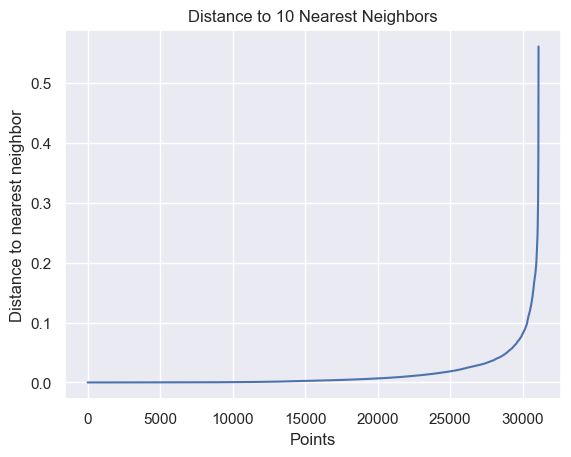

In [115]:
neighbors_dist(df_selected_4,10)

In [116]:
dbscan_labels= perform_dbscan_labels(df_selected_4,0.1,10,4)

# Calculate and print the number of clusters
dbscan_n_clusters = len(np.unique(dbscan_labels))
print(f"Number of estimated clusters: {dbscan_n_clusters}")

Number of estimated clusters: 9


In [117]:
# Concatenating the labels to df
df_concat = pd.concat([df_selected_4, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_concat.head()

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
customer_id                                                                    
1b8f824d5e               0.000000               0.115984                 0.0   
5d272b9dcb               0.051962               0.025663                 0.0   
f6d1b2ba63               0.037289               0.000000                 0.0   
180c632ed8               0.000000               0.126747                 0.0   
4eb37a6705               0.059055               0.164137                 0.0   

             purchased_cuisines   tot_CUI  dbscan_labels  
customer_id                                               
1b8f824d5e             0.166667  0.061205              0  
5d272b9dcb             0.333333  0.040711              1  
f6d1b2ba63             0.166667  0.019497              0  
180c632ed8             0.333333  0.066884              1  
4eb37a6705             0.333333  0.117492              1

In [118]:
df_concat.loc[df_concat['dbscan_labels'] == -1]

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
customer_id                                                                    
58b53ace3f               0.400940               0.000000            0.324730   
928baa4e96               0.376135               0.292691            0.000000   
63953d4795               0.143077               0.401124            0.589302   
f9e82c7579               0.349019               0.042490            0.120915   
db250450d8               0.000000               0.874739            0.000000   
...                           ...                    ...                 ...   
fc2816f615               0.170801               0.125382            0.508137   
b45d0633e7               0.024603               0.362088            0.407630   
7ed46af927               0.617866               0.137912            0.067494   
2e89f34f20               0.553421               0.420321            0.082233   
f6308403d1               0.122365               0.627791            0.162865   

             purchased_cuisines   tot_CUI  dbscan_labels  
customer_id                                               
58b53ace3f             0.500000  0.312826             -1  
928baa4e96             1.000000  0.351121             -1  
63953d4795             0.833333  0.473742             -1  
f9e82c7579             1.000000  0.243335             -1  
db250450d8             0.333333  0.461599             -1  
...                         ...       ...            ...  
fc2816f615             1.000000  0.316937             -1  
b45d0633e7             0.500000  0.333468             -1  
7ed46af927             0.833333  0.417285             -1  
2e89f34f20             0.666667  0.537299             -1  
f6308403d1             0.500000  0.447018             -1  

[535 rows x 6 columns]

In [119]:
# Computing the R^2 of the cluster solution
df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3240


C:\Users\rcouc\AppData\Local\Temp\ipykernel_17480\1130391443.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels


In [120]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_4, dbscan_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_4,dbscan_labels))

BD index for this solution:  1.3778041188279864
Silhouette score for this solution:  0.32797986616698943


<div class="alert alert-block alert-success">
<a class="anchor" id="section_7">
    
# 7. MeanShift Clustering
    
[Back to ToC](#toc)

</a>
<div>

In [121]:
def find_best_quantile(df, quantile_range=np.arange(0.1, 0.5, 0.05), random_state=1):
    """
    Finds the best quantile for Mean Shift clustering on a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        quantile_range (array): Range of quantile values to test.
        random_state (int): Seed for reproducibility in bandwidth estimation.

    Returns:
        dict: A dictionary containing the best quantile, best score, best bandwidth, and cluster labels.
    """
    best_score = -1
    best_quantile = None
    best_bandwidth = None
    best_labels = None
    
    for quantile in quantile_range:
        # Estimate the bandwidth
        bandwidth = estimate_bandwidth(df, quantile=quantile, random_state=random_state, n_jobs=-1)
        
        # Perform Mean Shift clustering
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=4)
        labels = ms.fit_predict(df)
        
        # Evaluate the clustering quality
        if len(set(labels)) > 1:  # Silhouette score is only meaningful with more than 1 cluster
            score = silhouette_score(df, labels)
            if score > best_score:
                best_score = score
                best_quantile = quantile
                best_bandwidth = bandwidth
                best_labels = labels
    
    # Return the best results
    return {
        'best_quantile': best_quantile,
        'best_score': best_score,
        'best_bandwidth': best_bandwidth,
        'best_labels': best_labels
    }


<a class="anchor" id="section_7_1">
    
## 7.1  Customer profile Perspective
    
</a>

In [122]:
# Find the best quantile:

result = find_best_quantile(df_selected_1, quantile_range=np.arange(0.1, 0.4, 0.1), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.2
Best score: 0.477545766933908
Best bandwidth: 0.33645255614561803


In [123]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4) 
ms_labels = ms.fit_predict(df_selected_1)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 3


In [124]:
# Concatenating the labels to df
df_concat_profile = pd.concat([df_selected_1, pd.Series(ms_labels, index=df_selected_1.index, name="ms_labels")], axis=1)
df_concat_profile.groupby(by='ms_labels').mean()

customer_age  first_order  last_order  dif_order
ms_labels                                                  
0              0.192223     0.152117    0.856397   0.762368
1              0.192763     0.676456    0.807748   0.301931
2              0.190344     0.216950    0.346325   0.300391

In [125]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_1)  # get total sum of squares
ssw_labels = df_concat_profile.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.7013


C:\Users\rcouc\AppData\Local\Temp\ipykernel_17480\4208916550.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_profile.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


In [126]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_1, ms_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_1,ms_labels))

BD index for this solution:  0.7504861332270493
Silhouette score for this solution:  0.477545766933908


<a class="anchor" id="section_7_2">
    
## 7.2  Purchasing Patterns Perspective
    
</a>

In [127]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.4, 0.9, 0.2), random_state=42)

In [128]:
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.8000000000000002
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [129]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


In [130]:
# Concatenating the labels to df
df_concat_purchasing = pd.concat([df_selected_2, pd.Series(ms_labels, index=df_selected_2.index, name="ms_labels")], axis=1)
df_concat_purchasing.head()
df_concat_purchasing.groupby(by='ms_labels').mean()

tot_work_days  tot_leisure_days
ms_labels                                 
0               0.081291          0.057312
1               0.625962          0.334914
2               0.564103          0.804598
3               0.403846          0.620690
4               0.272115          0.499138

In [131]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_2)  # get total sum of squares
ssw_labels = df_concat_purchasing.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1790


C:\Users\rcouc\AppData\Local\Temp\ipykernel_17480\782448378.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_purchasing.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


In [132]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_2, ms_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_2,ms_labels))

BD index for this solution:  0.9439899017150962
Silhouette score for this solution:  0.7455130862253271


<a class="anchor" id="section_7_3">
    
## 7.3   Customer Behavior Perspective
    
</a>

In [133]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 0.9, 0.2), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

Best quantile: 0.8
Best score: 0.7455130862253271
Best bandwidth: 0.15683605650794874


In [134]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)


Number of estimated clusters : 5


In [135]:
# Concatenating the labels to df
df_concat_behavior = pd.concat([df_selected_3, pd.Series(ms_labels, index=df_selected_3.index, name="ms_labels")], axis=1)
df_concat_behavior.groupby(by='ms_labels').mean()

tot_early_morning  tot_breakfast  tot_lunch  tot_afternoon  \
ms_labels                                                               
0                   0.021190       0.036237   0.050982       0.044841   
1                   0.065789       0.283750   0.392434       0.301875   
2                   0.070175       0.283333   0.298246       0.600000   
3                   0.092105       0.231250   0.394737       0.500000   
4                   0.046053       0.215000   0.303947       0.242500   

           tot_dinner  tot_late_night  
ms_labels                              
0            0.033087        0.009694  
1            0.244375        0.064844  
2            0.616667        0.125000  
3            0.212500        0.046875  
4            0.241250        0.081250

In [136]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_3)  # get total sum of squares
ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0645


C:\Users\rcouc\AppData\Local\Temp\ipykernel_17480\530029619.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


In [137]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_3, ms_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_3,ms_labels))

BD index for this solution:  4.814891196181218
Silhouette score for this solution:  0.7030033268393308


<a class="anchor" id="section_7_4">
    
## 7.4   Culinary Preferences Perspective
    
</a>

In [ ]:
result = find_best_quantile(df_selected_2, quantile_range=np.arange(0.6, 0.9, 0.1), random_state=42)
print(f"Best quantile: {result['best_quantile']}")
print(f"Best score: {result['best_score']}")
print(f"Best bandwidth: {result['best_bandwidth']}")

In [173]:
ms = MeanShift(bandwidth=result['best_bandwidth'], bin_seeding=True, n_jobs=4)
ms_labels = ms.fit_predict(df_selected_2)
ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 5


In [174]:
# Concatenating the labels to df
df_concat_behavior = pd.concat([df_selected_4, pd.Series(ms_labels, index=df_selected_4.index, name="ms_labels")], axis=1)
df_concat_behavior.groupby(by='ms_labels').mean()

tot_western_cuisines  tot_oriental_cuisines  tot_other_cuisines  \
ms_labels                                                                    
0                      0.047866               0.064079            0.045435   
1                      0.260165               0.267166            0.257934   
2                      0.413613               0.293936            0.370015   
3                      0.414083               0.157641            0.237678   
4                      0.251389               0.260007            0.191310   

           purchased_cuisines   tot_CUI  
ms_labels                                
0                    0.355445  0.073279  
1                    0.798958  0.358977  
2                    0.888889  0.488952  
3                    0.750000  0.375223  
4                    0.812500  0.329440

In [175]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_selected_4)  # get total sum of squares
ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0367


C:\Users\rcouc\AppData\Local\Temp\ipykernel_23104\3307268555.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat_behavior.groupby(by='ms_labels').apply(get_ss)  # compute ssw for each cluster labels


In [176]:
print("BD index for this solution: ",davies_bouldin_score(df_selected_4, ms_labels))
print("Silhouette score for this solution: ",silhouette_score(df_selected_4,ms_labels))

BD index for this solution:  6.881452978593549
Silhouette score for this solution:  0.566480599751171


<div class="alert alert-block alert-success">
<a class="anchor" id="section_8">
    
# 8. Best Models
    
</a>
<div>

The Davies-Bouldin Index (DB Index) measures the compactness and separation of clusters. Lower values indicate better performance, as they signify more compact clusters and greater separation between them.

On the other hand, the Silhouette Score evaluates the cohesion and separation of clusters. Scores close to 1 suggest well-formed clusters, while negative values indicate issues with cluster formation.

### **Customer Profile Perspective:**

 - **HC + K-means**:
   - BD index for this solution:  0.727472900825295
   - Silhouette score for this solution:  0.4512477757309634

 - **K-means**:
    - BD index for this solution:  0.7353979771399808
    - Silhouette score for this solution:  0.47972625207353076
  
 - **DBSCAN**:
    - BD index for this solution:  2.1786218353292326
    - Silhouette score for this solution:  -0.3449233247514681
 - **MeanShift**:
   - BD index for this solution:  0.7504861332270493
   - Silhouette score for this solution:  0.477545766933908


**CONCLUSION**: The HC + K-means method demonstrates the best overall performance based on the BD Index and a strong Silhouette Score, suggesting it is the most suitable for forming compact and well-separated clusters.

### **Purchasing Patterns Perspective:**

 - **HC + K-means**:
    - BD index for this solution:  0.8650251626779752
    - Silhouette score for this solution:  0.5893670455791455
 - **K-means**:
    - BD index for this solution:  0.9290311359606013
    - Silhouette score for this solution:  0.49726365031471165
 - **DBSCAN**:
    - BD index for this solution:  1.3373354554469654
    - Silhouette score for this solution:  0.7569501995546835
 - **MeanShift**:
    - BD index for this solution:  0.9439899017150962
    - Silhouette score for this solution:  0.7455130862253271
  
**CONCLUSION**: The HC + K-means approach emerges as the most balanced and robust model, achieving an excellent combination of compactness and separation, as indicated by the BD Index and a solid Silhouette Score. This suggests that it is particularly well-suited for identifying clusters that are both distinct and cohesive, offering a reliable solution for segmenting purchasing patterns.

### **Customer Behavior Perspective:**
 - **HC + K-means**:
   - BD index for this solution:  1.3970050376189889
   - Silhouette score for this solution:  0.7035925802696835
 - **K-means**:
    - BD index for this solution:  1.4594443418926522
    - Silhouette score for this solution:  0.4069674974025588
 - **DBSCAN**:
    - BD index for this solution:  1.593335447325101
    - Silhouette score for this solution:  0.21245348565865296
 - **MeanShift**:
    - BD index for this solution:  4.814891196181218
    - Silhouette score for this solution:  0.7030033268393308

**CONCLUSION**: HC + K-means emerges as the most effective clustering method for this context, offering the best combination of cluster cohesion and separation. Its Silhouette Score confirms that the clusters are well-formed, and its BD Index reflects a reasonable level of compactness.


### **Culinary Preferences Perspective:**
 - **HC + K-means**:
    - BD index for this solution:  0.9925374636634879
    - Silhouette score for this solution:  0.524749528228864
 - **K-means**:
    - BD index for this solution:  1.0639980526801185
    - Silhouette score for this solution:  0.37409986237268505
 - **DBSCAN**:
    - BD index for this solution:  1.3778041188279864
    - Silhouette score for this solution:  0.32797986616698943
 - **MeanShift**:
    - BD index for this solution:  6.881452978593549
    - Silhouette score for this solution:  0.566480599751171

**CONCLUSION**: HC + K-means is the most suitable clustering method for this perspective, offering the best balance between compactness, separation, and well-formed clusters.

In [ ]:
#https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.davies_bouldin_score.html


<div class="alert alert-block alert-success">
<a class="anchor" id="section_9">
    
# 9. Merging the Perspectives
    
</a>
<div>

In [ ]:
columns_of_interest = Customer_profile + Purchasing_patterns + Customer_behavior + Culinary_preferences

df_selected = df[columns_of_interest]

df_final = df_selected.copy()

In [ ]:
df_selected['customer_profile_labels']= kmhc_profile3['HC_label']
df_selected['purchasing_patterns_labels']= kmhc_purchasing3['HC_label']
df_selected['customer_behavior_labels']= kmhc_customer['HC_label']
df_selected['culinary_preferences_labels']= kmhc_culinary3['HC_label']

C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2269948692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['customer_perfil_labels']= kmhc_perfil3['HC_label']
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2269948692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['purchasing_patterns_labels']= kmhc_purchasing3['HC_label']
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2269948692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df_selected

customer_age  first_order  last_order  dif_order  tot_work_days  \
customer_id                                                                    
1b8f824d5e       0.046154     0.000000    0.011111   0.205357       0.000000   
5d272b9dcb       0.030769     0.000000    0.011111   0.205357       0.000000   
f6d1b2ba63       0.353846     0.000000    0.011111   0.205357       0.000000   
180c632ed8       0.169231     0.000000    0.022222   0.214286       0.038462   
4eb37a6705       0.076923     0.000000    0.022222   0.214286       0.038462   
...                   ...          ...         ...        ...            ...   
f4e366c281       0.230769     0.244444    0.000000   0.000000       0.000000   
f6b6709018       0.169231     0.244444    0.000000   0.000000       0.000000   
f74ad8ce3f       0.138462     0.244444    0.000000   0.000000       0.000000   
f7b19c0241       0.292308     0.244444    0.000000   0.000000       0.000000   
fd40d3b0e0       0.230769     0.244444    0.000000   0.000000       0.000000   

             tot_leisure_days  tot_early_morning  tot_breakfast  tot_lunch  \
customer_id                                                                  
1b8f824d5e           0.068966           0.000000           0.00   0.000000   
5d272b9dcb           0.068966           0.000000           0.05   0.052632   
f6d1b2ba63           0.068966           0.000000           0.05   0.052632   
180c632ed8           0.034483           0.000000           0.00   0.105263   
4eb37a6705           0.034483           0.000000           0.10   0.000000   
...                       ...                ...            ...        ...   
f4e366c281           0.034483           0.000000           0.00   0.052632   
f6b6709018           0.034483           0.000000           0.00   0.000000   
f74ad8ce3f           0.034483           0.052632           0.00   0.000000   
f7b19c0241           0.034483           0.000000           0.00   0.052632   
fd40d3b0e0           0.034483           0.000000           0.00   0.000000   

             tot_afternoon  ...  tot_late_night  tot_western_cuisines  \
customer_id                 ...                                         
1b8f824d5e            0.00  ...             0.0              0.000000   
5d272b9dcb            0.00  ...             0.0              0.051962   
f6d1b2ba63            0.00  ...             0.0              0.037289   
180c632ed8            0.00  ...             0.0              0.000000   
4eb37a6705            0.00  ...             0.0              0.059055   
...                    ...  ...             ...                   ...   
f4e366c281            0.00  ...             0.0              0.000000   
f6b6709018            0.05  ...             0.0              0.073119   
f74ad8ce3f            0.00  ...             0.0              0.000000   
f7b19c0241            0.00  ...             0.0              0.000000   
fd40d3b0e0            0.05  ...             0.0              0.032061   

             tot_oriental_cuisines  tot_other_cuisines  purchased_cuisines  \
customer_id                                                                  
1b8f824d5e                0.115984            0.000000            0.166667   
5d272b9dcb                0.025663            0.000000            0.333333   
f6d1b2ba63                0.000000            0.000000            0.166667   
180c632ed8                0.126747            0.000000            0.333333   
4eb37a6705                0.164137            0.000000            0.333333   
...                            ...                 ...                 ...   
f4e366c281                0.000000            0.120315            0.166667   
f6b6709018                0.000000            0.000000            0.166667   
f74ad8ce3f                0.000000            0.118647            0.166667   
f7b19c0241                0.048313            0.000000            0.166667   
fd40d3b0e0                0.000000            0.000000            0.166

In [ ]:
# Create a cross-tabulation (crosstab) to show the frequency of occurrences for each combination of labels
crosstab_result = pd.crosstab(
    # Define the rows (index) for the crosstab using four different customer-related labels
    index=[df_selected['customer_profile_labels'], 
           df_selected['purchasing_patterns_labels'], 
           df_selected['customer_behavior_labels'], 
           df_selected['culinary_preferences_labels']],
    
    # Define the columns for the crosstab, using a single column named 'count'
    # The 'count' will show the number of occurrences for each combination of the above labels
    columns='count',  # 'count' will display the frequency of each group combination
)

# Display the resulting crosstab
print(crosstab_result)


col_0                                                                                                   count
customer_perfil_labels purchasing_patterns_labels customer_behavior_labels culinary_preferences_labels       
0                      0                          0                        0                              130
                                                                           1                               67
                                                                           2                               50
                                                  1                        0                              338
                                                                           1                              147
                                                                           2                               78
                                                  2                        0                               67
          

In [ ]:
df_centroids = df_selected.groupby([
    'customer_profile_labels', 
    'purchasing_patterns_labels', 
    'customer_behavior_labels', 
    'culinary_preferences_labels'
]).mean()

df_centroids

customer_age  \
customer_perfil_labels purchasing_patterns_labels customer_behavior_labels culinary_preferences_labels                 
0                      0                          0                        0                                0.203077   
                                                                           1                                0.212400   
                                                                           2                                0.194462   
                                                  1                        0                                0.189986   
                                                                           1                                0.188592   
                                                                           2                                0.191716   
                                                  2                        0                                0.182778   
                                                                           1                                0.181766   
                                                                           2                                0.153846   
                       1                          0                        0                                0.215385   
                                                                           1                                0.232967   
                                                                           2                                0.221538   
                                                  1                        0                                0.189774   
                                                                           1                                0.194174   
                                                                           2                                0.207692   
                                                  2                        0                                0.178462   
                                                                           1                                0.184615   
                                                                           2                                0.123077   
                       2                          0                        0                                0.206020   
                                                                           1                                0.181538   
                                                                           2                                0.176068   
                                                  1                        0                                0.185592   
                                                                           1                                0.189938   
                                                                           2                                0.183017   
                                                  2                        0                                0.216783   
                                                                           1                                0.225000   
1                      0                          1                        0                                0.161538   
                                                                           2                                0.230769   
                       1                          1                        0                                0.219487   
                                                                           1                                0.190140   
                                                                           2                                0.174359   
                       2                          0                        0                                0.153846   
                        

In [ ]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

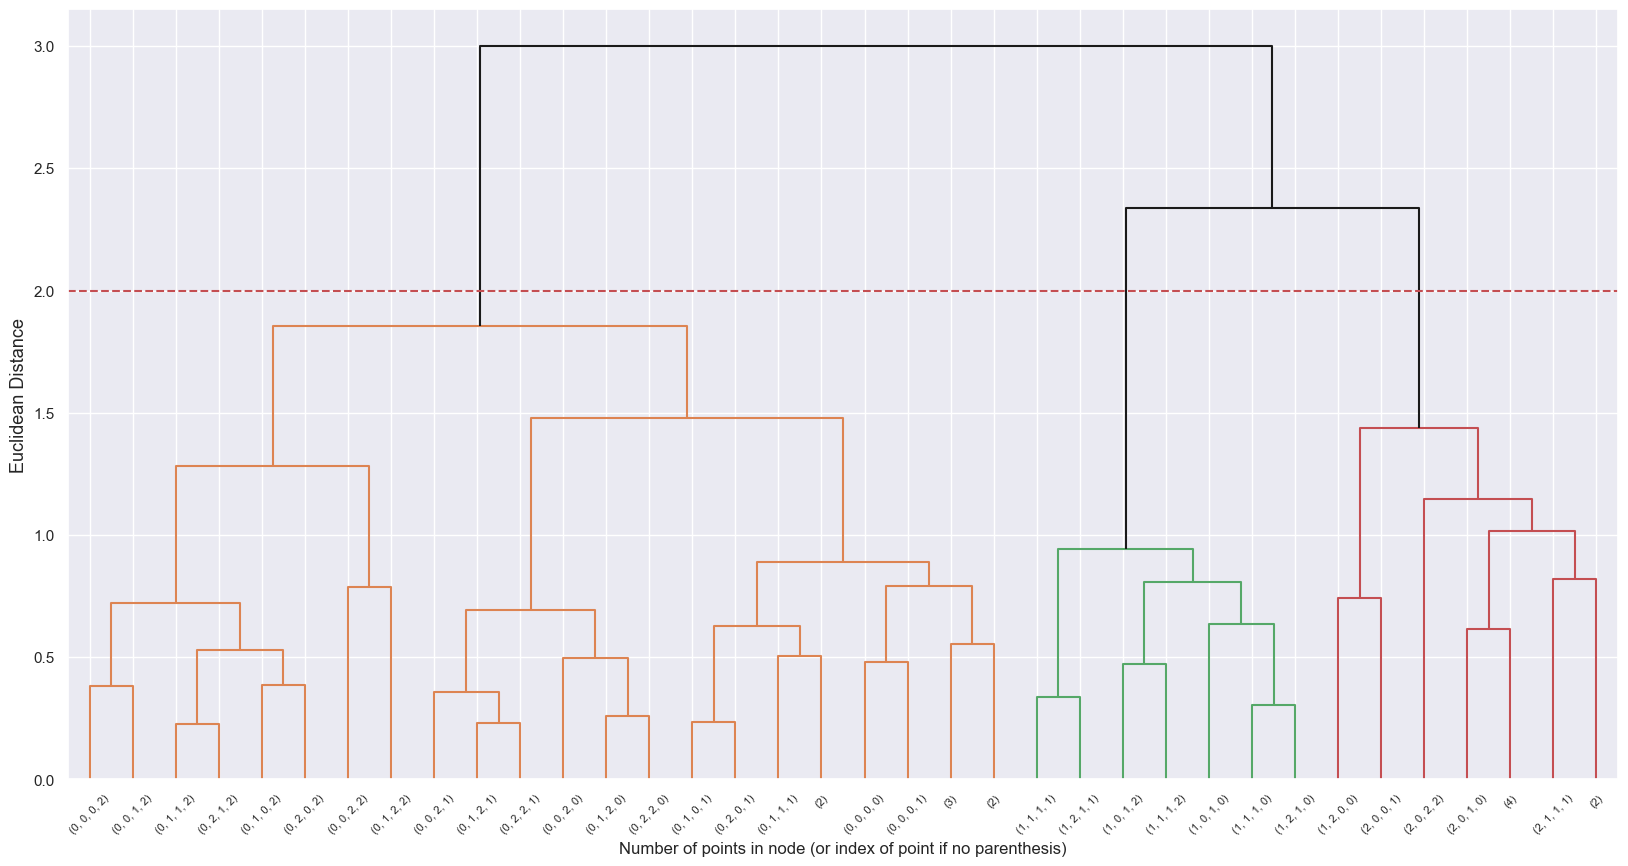

In [ ]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(20,10))
#The Dendrogram parameters need to be tuned
y_threshold = 2
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

customer_age  \
customer_perfil_labels purchasing_patterns_labels customer_behavior_labels culinary_preferences_labels                 
0                      0                          0                        0                                0.203077   
                                                                           1                                0.212400   
                                                                           2                                0.194462   
                                                  1                        0                                0.189986   
                                                                           1                                0.188592   
                                                                           2                                0.191716   
                                                  2                        0                                0.182778   
                                                                           1                                0.181766   
                                                                           2                                0.153846   
                       1                          0                        0                                0.215385   
                                                                           1                                0.232967   
                                                                           2                                0.221538   
                                                  1                        0                                0.189774   
                                                                           1                                0.194174   
                                                                           2                                0.207692   
                                                  2                        0                                0.178462   
                                                                           1                                0.184615   
                                                                           2                                0.123077   
                       2                          0                        0                                0.206020   
                                                                           1                                0.181538   
                                                                           2                                0.176068   
                                                  1                        0                                0.185592   
                                                                           1                                0.189938   
                                                                           2                                0.183017   
                                                  2                        0                                0.216783   
                                                                           1                                0.225000   
1                      0                          1                        0                                0.161538   
                                                                           2                                0.230769   
                       1                          1                        0                                0.219487   
                                                                           1                                0.190140   
                                                                           2                                0.174359   
                       2                          0                        0                                0.153846   
                        

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper


{(0, 0, 0, 0): 0,
 (0, 0, 0, 1): 0,
 (0, 0, 0, 2): 0,
 (0, 0, 1, 0): 0,
 (0, 0, 1, 1): 0,
 (0, 0, 1, 2): 0,
 (0, 0, 2, 0): 0,
 (0, 0, 2, 1): 0,
 (0, 0, 2, 2): 0,
 (0, 1, 0, 0): 0,
 (0, 1, 0, 1): 0,
 (0, 1, 0, 2): 0,
 (0, 1, 1, 0): 0,
 (0, 1, 1, 1): 0,
 (0, 1, 1, 2): 0,
 (0, 1, 2, 0): 0,
 (0, 1, 2, 1): 0,
 (0, 1, 2, 2): 0,
 (0, 2, 0, 0): 0,
 (0, 2, 0, 1): 0,
 (0, 2, 0, 2): 0,
 (0, 2, 1, 0): 0,
 (0, 2, 1, 1): 0,
 (0, 2, 1, 2): 0,
 (0, 2, 2, 0): 0,
 (0, 2, 2, 1): 0,
 (1, 0, 1, 0): 2,
 (1, 0, 1, 2): 2,
 (1, 1, 1, 0): 2,
 (1, 1, 1, 1): 2,
 (1, 1, 1, 2): 2,
 (1, 2, 0, 0): 1,
 (1, 2, 1, 0): 2,
 (1, 2, 1, 1): 2,
 (2, 0, 0, 1): 1,
 (2, 0, 1, 0): 1,
 (2, 0, 1, 1): 1,
 (2, 0, 2, 2): 1,
 (2, 1, 1, 0): 1,
 (2, 1, 1, 1): 1,
 (2, 1, 1, 2): 1,
 (2, 2, 1, 0): 1,
 (2, 2, 1, 1): 1,
 (2, 2, 1, 2): 1}

In [ ]:
df_ = df_selected.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['customer_profile_labels'], row['purchasing_patterns_labels'],\
          row['customer_behavior_labels'], row['culinary_preferences_labels'])
    ], axis=1
)

df_ 

customer_age  first_order  last_order  dif_order  tot_work_days  \
customer_id                                                                    
1b8f824d5e       0.046154     0.000000    0.011111   0.205357       0.000000   
5d272b9dcb       0.030769     0.000000    0.011111   0.205357       0.000000   
f6d1b2ba63       0.353846     0.000000    0.011111   0.205357       0.000000   
180c632ed8       0.169231     0.000000    0.022222   0.214286       0.038462   
4eb37a6705       0.076923     0.000000    0.022222   0.214286       0.038462   
...                   ...          ...         ...        ...            ...   
f4e366c281       0.230769     0.244444    0.000000   0.000000       0.000000   
f6b6709018       0.169231     0.244444    0.000000   0.000000       0.000000   
f74ad8ce3f       0.138462     0.244444    0.000000   0.000000       0.000000   
f7b19c0241       0.292308     0.244444    0.000000   0.000000       0.000000   
fd40d3b0e0       0.230769     0.244444    0.000000   0.000000       0.000000   

             tot_leisure_days  tot_early_morning  tot_breakfast  tot_lunch  \
customer_id                                                                  
1b8f824d5e           0.068966           0.000000           0.00   0.000000   
5d272b9dcb           0.068966           0.000000           0.05   0.052632   
f6d1b2ba63           0.068966           0.000000           0.05   0.052632   
180c632ed8           0.034483           0.000000           0.00   0.105263   
4eb37a6705           0.034483           0.000000           0.10   0.000000   
...                       ...                ...            ...        ...   
f4e366c281           0.034483           0.000000           0.00   0.052632   
f6b6709018           0.034483           0.000000           0.00   0.000000   
f74ad8ce3f           0.034483           0.052632           0.00   0.000000   
f7b19c0241           0.034483           0.000000           0.00   0.052632   
fd40d3b0e0           0.034483           0.000000           0.00   0.000000   

             tot_afternoon  ...  tot_western_cuisines  tot_oriental_cuisines  \
customer_id                 ...                                                
1b8f824d5e            0.00  ...              0.000000               0.115984   
5d272b9dcb            0.00  ...              0.051962               0.025663   
f6d1b2ba63            0.00  ...              0.037289               0.000000   
180c632ed8            0.00  ...              0.000000               0.126747   
4eb37a6705            0.00  ...              0.059055               0.164137   
...                    ...  ...                   ...                    ...   
f4e366c281            0.00  ...              0.000000               0.000000   
f6b6709018            0.05  ...              0.073119               0.000000   
f74ad8ce3f            0.00  ...              0.000000               0.000000   
f7b19c0241            0.00  ...              0.000000               0.048313   
fd40d3b0e0            0.05  ...              0.032061               0.000000   

             tot_other_cuisines  purchased_cuisines   tot_CUI  \
customer_id                                                     
1b8f824d5e             0.000000            0.166667  0.061205   
5d272b9dcb             0.000000            0.333333  0.040711   
f6d1b2ba63             0.000000            0.166667  0.019497   
180c632ed8             0.000000            0.333333  0.066884   
4eb37a6705             0.000000            0.333333  0.117492   
...                         ...                 ...       ...   
f4e366c281             0.120315            0.166667  0.038232   
f6b6709018             0.000000            0.166667  0.038232   
f74ad8ce3f             0.118647            0.166667  0.037702   
f7b19c0241             0.000000            0.166667  0.025495   
fd40d3b0e0             0.000000            0.166667  0.016763   

             customer_perfil_labels  purchasing_patterns_labels  \
cus

In [ ]:
df_final['merged_labels'] = df_.merged_labels
df_final

customer_age  first_order  last_order  dif_order  tot_work_days  \
customer_id                                                                    
1b8f824d5e       0.046154     0.000000    0.011111   0.205357       0.000000   
5d272b9dcb       0.030769     0.000000    0.011111   0.205357       0.000000   
f6d1b2ba63       0.353846     0.000000    0.011111   0.205357       0.000000   
180c632ed8       0.169231     0.000000    0.022222   0.214286       0.038462   
4eb37a6705       0.076923     0.000000    0.022222   0.214286       0.038462   
...                   ...          ...         ...        ...            ...   
f4e366c281       0.230769     0.244444    0.000000   0.000000       0.000000   
f6b6709018       0.169231     0.244444    0.000000   0.000000       0.000000   
f74ad8ce3f       0.138462     0.244444    0.000000   0.000000       0.000000   
f7b19c0241       0.292308     0.244444    0.000000   0.000000       0.000000   
fd40d3b0e0       0.230769     0.244444    0.000000   0.000000       0.000000   

             tot_leisure_days  tot_early_morning  tot_breakfast  tot_lunch  \
customer_id                                                                  
1b8f824d5e           0.068966           0.000000           0.00   0.000000   
5d272b9dcb           0.068966           0.000000           0.05   0.052632   
f6d1b2ba63           0.068966           0.000000           0.05   0.052632   
180c632ed8           0.034483           0.000000           0.00   0.105263   
4eb37a6705           0.034483           0.000000           0.10   0.000000   
...                       ...                ...            ...        ...   
f4e366c281           0.034483           0.000000           0.00   0.052632   
f6b6709018           0.034483           0.000000           0.00   0.000000   
f74ad8ce3f           0.034483           0.052632           0.00   0.000000   
f7b19c0241           0.034483           0.000000           0.00   0.052632   
fd40d3b0e0           0.034483           0.000000           0.00   0.000000   

             tot_afternoon  tot_dinner  tot_late_night  tot_western_cuisines  \
customer_id                                                                    
1b8f824d5e            0.00         0.1             0.0              0.000000   
5d272b9dcb            0.00         0.0             0.0              0.051962   
f6d1b2ba63            0.00         0.0             0.0              0.037289   
180c632ed8            0.00         0.0             0.0              0.000000   
4eb37a6705            0.00         0.0             0.0              0.059055   
...                    ...         ...             ...                   ...   
f4e366c281            0.00         0.0             0.0              0.000000   
f6b6709018            0.05         0.0             0.0              0.073119   
f74ad8ce3f            0.00         0.0             0.0              0.000000   
f7b19c0241            0.00         0.0             0.0              0.000000   
fd40d3b0e0            0.05         0.0             0.0              0.032061   

             tot_oriental_cuisines  tot_other_cuisines  purchased_cuisines  \
customer_id                                                                  
1b8f824d5e                0.115984            0.000000            0.166667   
5d272b9dcb                0.025663            0.000000            0.333333   
f6d1b2ba63                0.000000            0.000000            0.166667   
180c632ed8                0.126747            0.000000            0.333333   
4eb37a6705                0.164137            0.000000            0.333333   
...                            ...                 ...                 ...   
f4e366c281                0.000000            0.120315            0.166667   
f6b6709018                0.000000            0.000000            0.166667   
f74ad8ce3f                0.000000            0.118647            0.166667   
f7b19c0241                0.048313            0.000000    

In [ ]:
# Merged cluster centroids
df_final.groupby('merged_labels').mean()

customer_age  first_order  last_order  dif_order  \
merged_labels                                                     
0                  0.193516     0.201444    0.832442   0.703481   
1                  0.189416     0.205778    0.299499   0.271740   
2                  0.190333     0.723226    0.786462   0.247244   

               tot_work_days  tot_leisure_days  tot_early_morning  \
merged_labels                                                       
0                   0.122151          0.084972           0.029178   
1                   0.039210          0.031193           0.011630   
2                   0.039270          0.026822           0.012813   

               tot_breakfast  tot_lunch  tot_afternoon  tot_dinner  \
merged_labels                                                        
0                   0.054472   0.077193       0.067552    0.050088   
1                   0.016590   0.026090       0.021439    0.018850   
2                   0.019029   0.022648       0.021418    0.012985   

               tot_late_night  tot_western_cuisines  tot_oriental_cuisines  \
merged_labels                                                                
0                    0.014460              0.067630               0.088969   
1                    0.005256              0.027287               0.035603   
2                    0.004447              0.027528               0.038687   

               tot_other_cuisines  purchased_cuisines   tot_CUI  
merged_labels                                                    
0                        0.063857            0.455643  0.102601  
1                        0.026618            0.249237  0.041513  
2                        0.026027            0.234580  0.043079

In [ ]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_final.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts

0
merged_labels       
0              16961
1               6992
2               7139

### Cluster Analysis

In [ ]:
def cluster_profiles(df, label_columns, figsize, 
                     cmap="tab10",
                     compare_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compare_titles == None:
        compare_titles = [""]*len(label_columns)
        
    fig, axes = plt.subplots(nrows=len(label_columns), 
                             ncols=2, 
                             figsize=figsize, 
                             constrained_layout=True,
                             squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compare_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, 
                                            label, 
                                            color = sns.color_palette(cmap),
                                            ax=ax[0])



        sns.barplot(x=label, 
                    hue=label,
                    y="counts", 
                    data=counts, 
                    ax=ax[1], 
                    palette=sns.color_palette(cmap),
                    legend=False
                    )

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                              rotation=40,
                              ha='right'
                              )
        
        ax[0].legend(handles, cluster_labels,
                     loc='center left', bbox_to_anchor=(1, 0.5), title=label
                     ) # Adaptable to number of clusters
        
        ax[1].set_xticks([i for i in range(len(handles))])
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        
        
    
    # plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profiling", fontsize=23)
    plt.show()

C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,
C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\2074131698.py:35: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=label,


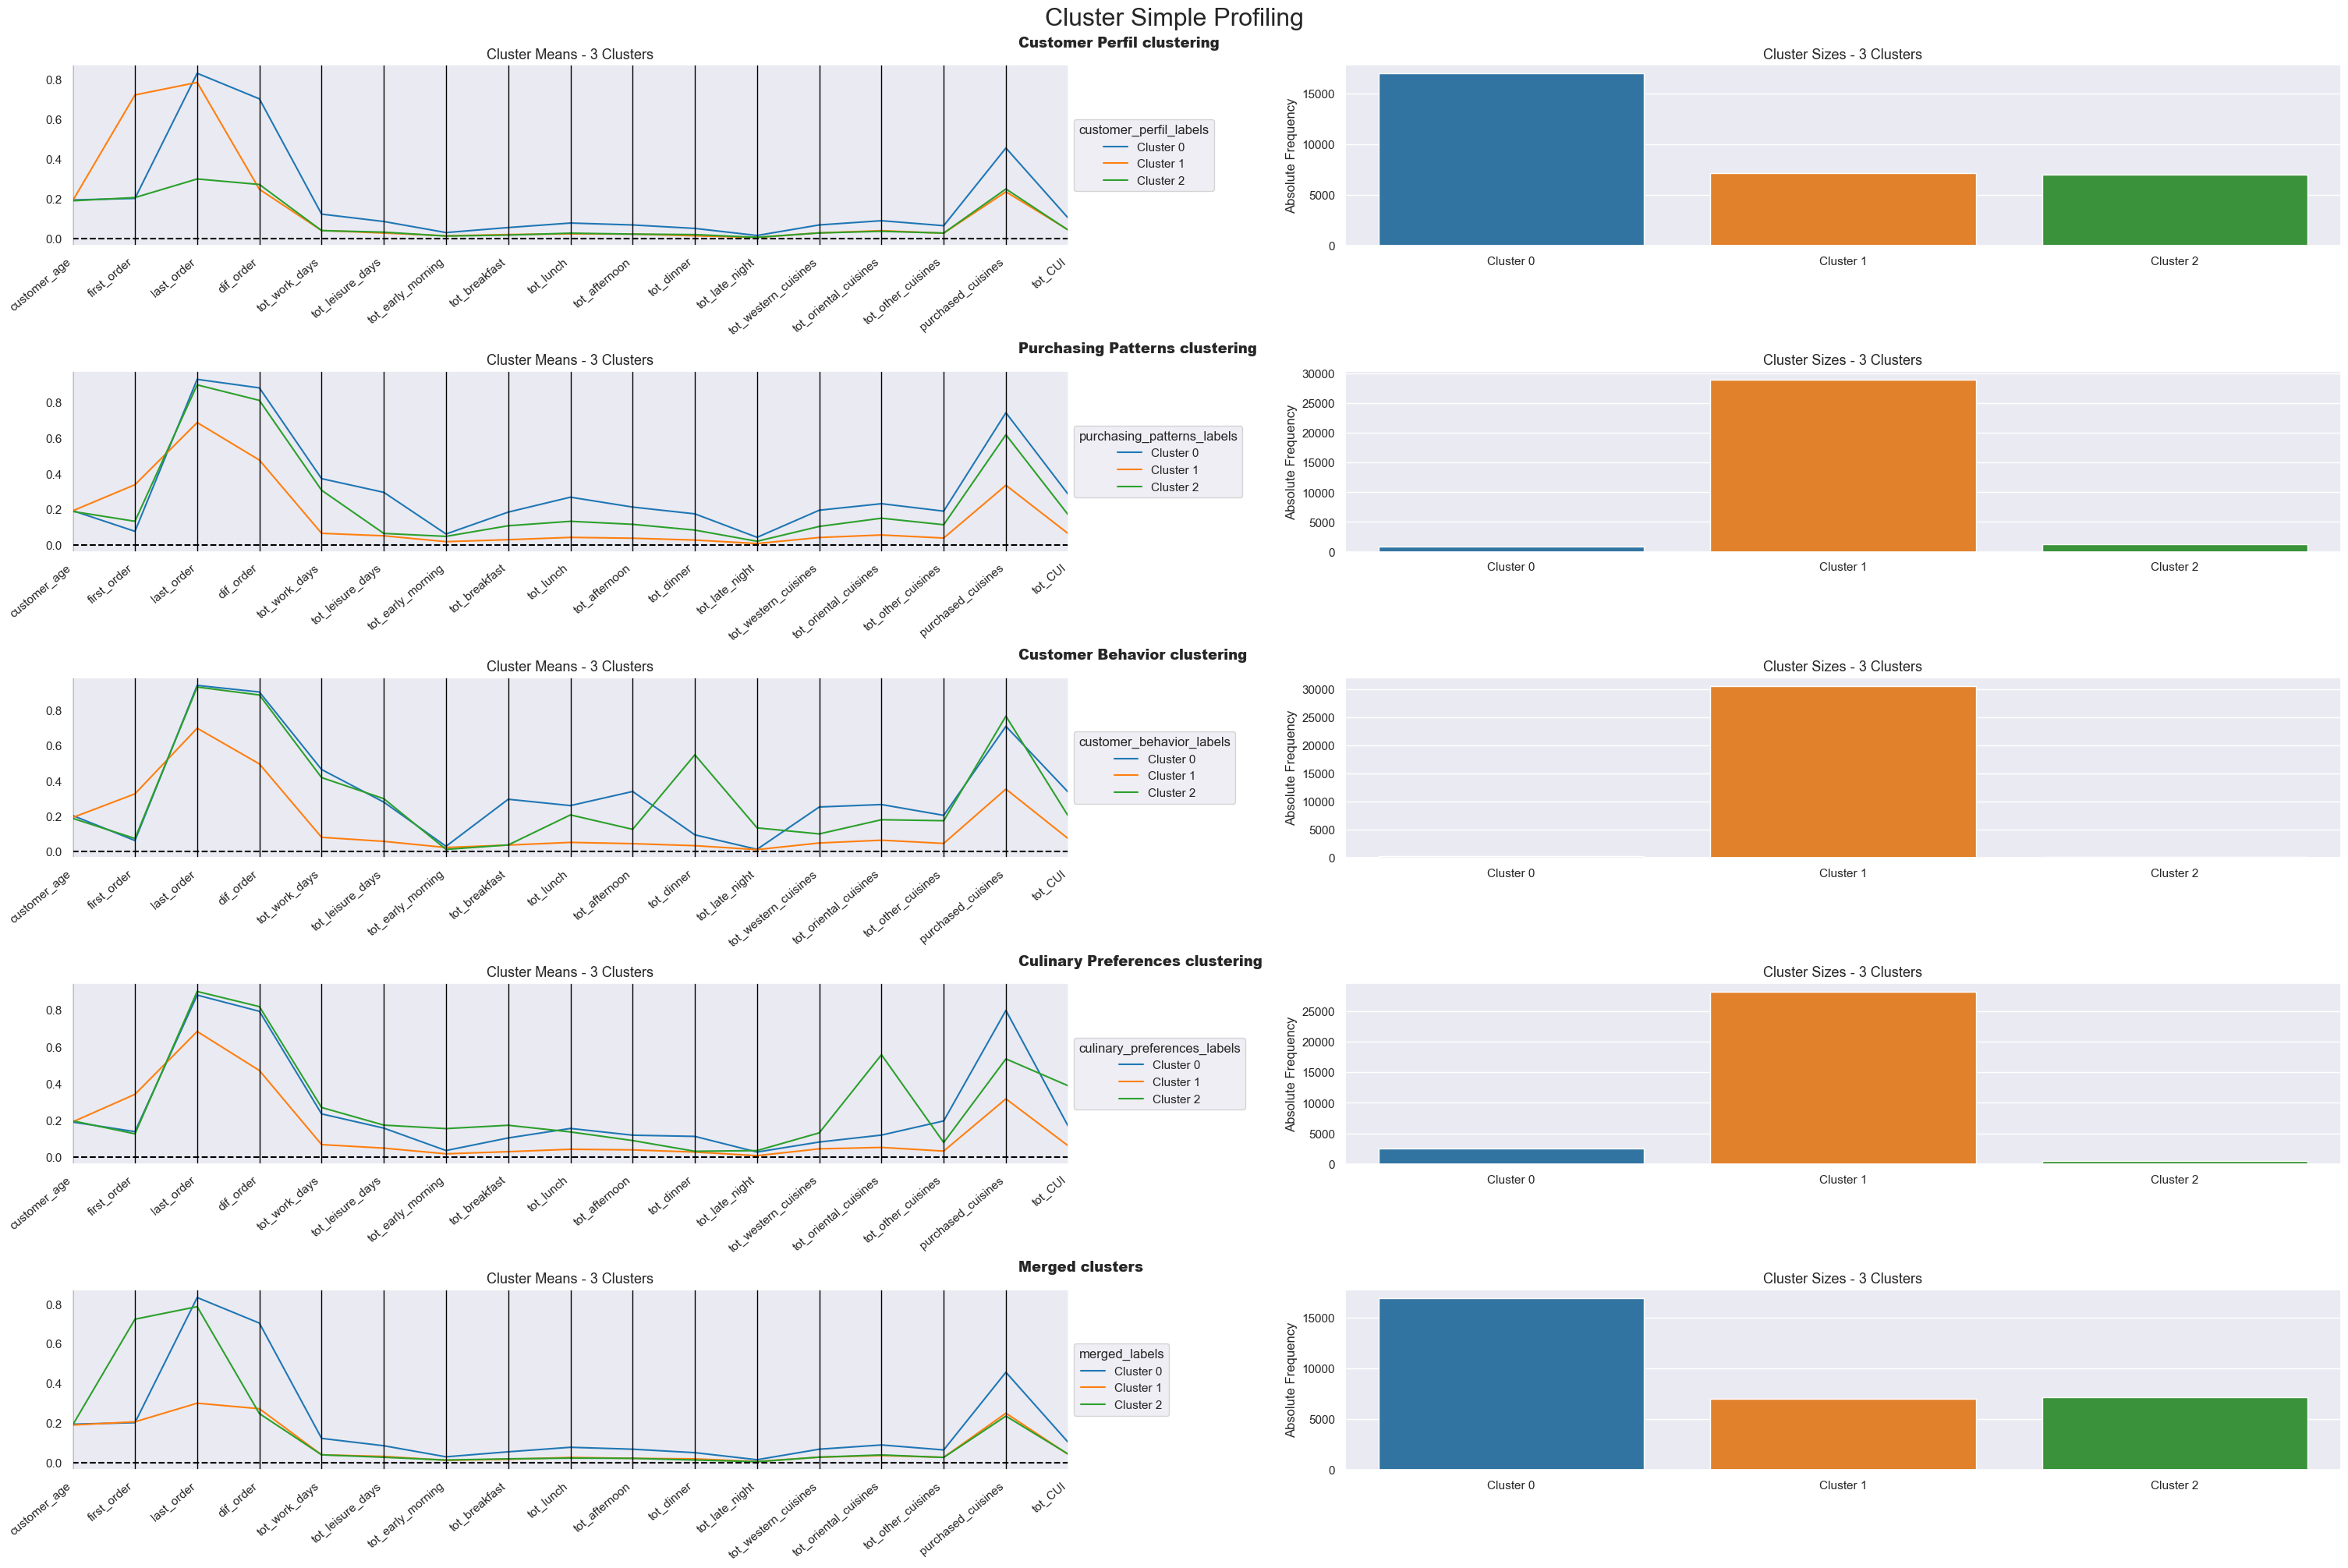

In [ ]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df_, 
    label_columns = ['customer_profile_labels', 
    'purchasing_patterns_labels', 
    'customer_behavior_labels', 
    'culinary_preferences_labels',
    'merged_labels'], 
    figsize = (30, 20), 
    compare_titles = ["Customer Profile clustering", "Purchasing Patterns clustering", "Customer Behavior clustering","Culinary Preferences clustering", "Merged clusters"]
)

## Cluster visualization using t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_final.iloc[:, :-1])

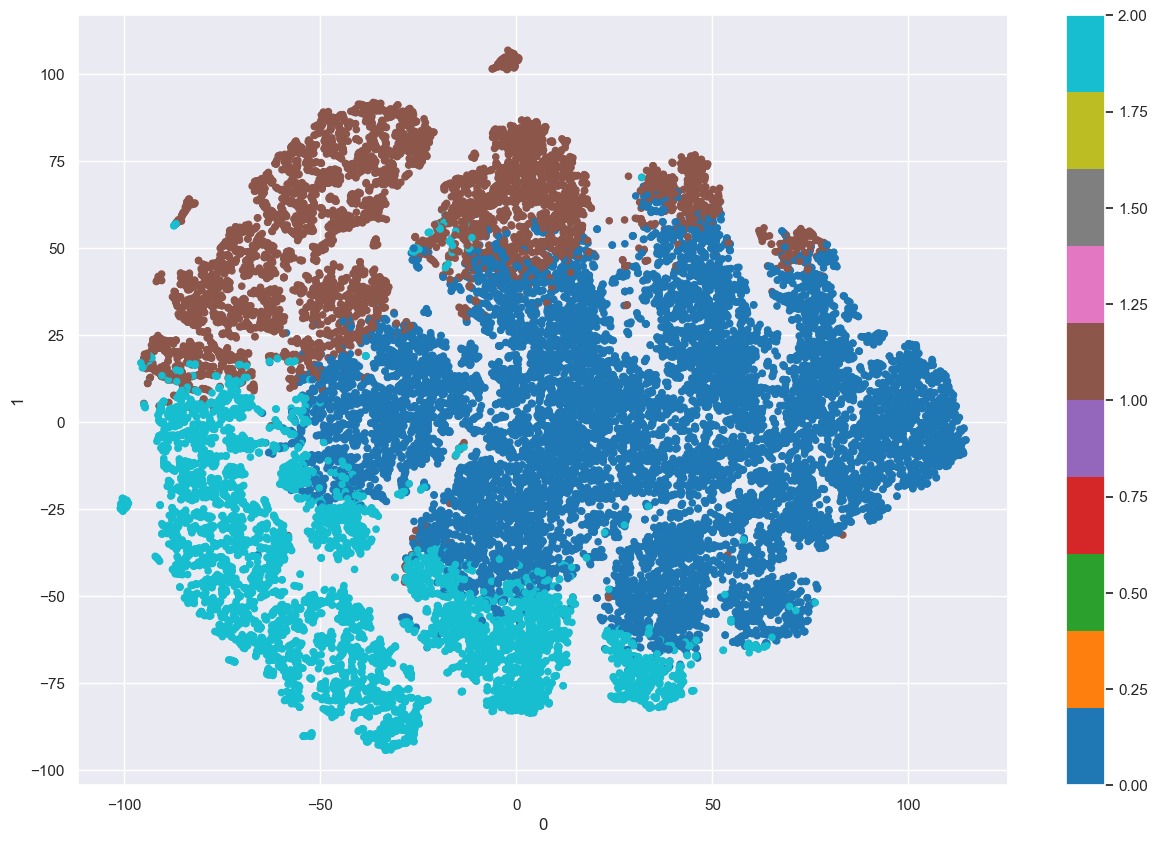

In [ ]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_final.iloc[:, -1], colormap='tab10', figsize=(15,10))
plt.show()

In [ ]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [ ]:
r2_variables(df_final, 'merged_labels').drop('merged_labels')

C:\Users\rcouc\AppData\Local\Temp\ipykernel_7228\364241649.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
c:\Users\rcouc\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


customer_age             0.000285
first_order              0.670258
last_order               0.708198
dif_order                0.725118
tot_work_days            0.192292
tot_leisure_days         0.173502
tot_early_morning        0.021712
tot_breakfast            0.063018
tot_lunch                0.097022
tot_afternoon            0.079791
tot_dinner               0.057727
tot_late_night           0.010159
tot_western_cuisines     0.051844
tot_oriental_cuisines    0.066715
tot_other_cuisines       0.044937
purchased_cuisines       0.263585
tot_CUI                  0.140047
merged_labels            1.000000
dtype: float64

**profiling with unused / categorical features** ??